### 1. Import Python Packages

In [1]:
#Import required packages
from pathlib import Path
import csv
import pandas as pd
import geopandas as gpd
import glob
#from shapely.geometry import Polygon, mapping
from shapely.geometry import Point
import numpy as np
#from shapely.geometry.polygon import Polygon

### 2 . Retrive multiple raw data files, clean the format, and combine them all into one single dataframe. shape (225001 rows × 17 columns)

In [2]:
parent_path = Path.cwd().parent

In [3]:
CRIME_DATA = "crime.CSV"

In [4]:
#parse_dates=['date']
with open (parent_path/CRIME_DATA, newline = '') as file:
    crime_df = pd.read_csv(file, skipinitialspace=True)
    
crime_df.tail(10)

C:\Users\coffe\AppData\Local\Temp\ipykernel_15596\540064283.py:3: DtypeWarning: Columns (10,11,12,13,14,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_df = pd.read_csv(file, skipinitialspace=True)


,Unnamed: 0,crime,number,date,location,beat,neighborhood,npu,lat,long,type,road,neighbourhood_lookup,city,county,state,postcode,country
270678,82405,LARCENY-FROM VEHICLE,1.636620e+08,12/31/2016,855 PEACHTREE ST NE,505.0,Midtown,E,33.77798,-84.38389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270679,82406,LARCENY-FROM VEHICLE,1.636620e+08,12/31/2016,1241 EUCLID AVE NE,608.0,Candler Park,N,33.76676,-84.34724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270680,82407,AUTO THEFT,1.636622e+08,12/31/2016,2914 OLDKNOW DR NW,112.0,Collier Heights,I,33.77157,-84.48312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270681,82408,BURGLARY-RESIDENCE,1.636623e+08,12/31/2016,650 LYRIC WAY NW,112.0,Collier Heights,I,33.77304,-84.47748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270682,82409,BURGLARY-RESIDENCE,1.636623e+08,12/31/2016,144 MORELAND AVE NE,606.0,Reynoldstown,N,33.75698,-84.34929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270683,82410,LARCENY-FROM VEHICLE,1.636623e+08,12/31/2016,BAKER ST NE / PEACHTREE ST NE,508.0,Downtown,M,33.76226,-84.38755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270684,82411,AGG ASSAULT,1.636625e+08,12/31/2016,590 SW CASCADE RD SW,402.0,West End,T,33.73812,-84.43276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270685,82412,AGG ASSAULT,1.636511e+08,12/31/2016,3210 MATHIESON DR.,208.0,Buckhead Forest,B,33.84320,-84.37730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270686,82413,ROBBERY-PEDESTRIAN,1.636520e+08,12/31/2016,OAKLAND DR SW/ CAMPBELLTON RD SW,403.0,Oakland City,S,33.71759,-84.42745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270687,82414,HOMICIDE,1.636610e+11,12/31/2016,1090 HOLLYWOOD RD NW,109.0,Almond Park,G,33.78459,-84.46085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
crime_df.dtypes
# dtype = {'beat': int}

Unnamed: 0                int64
crime                    object
number                  float64
date                     object
location                 object
beat                    float64
neighborhood             object
npu                      object
lat                     float64
long                    float64
type                     object
road                     object
neighbourhood_lookup     object
city                     object
county                   object
state                    object
postcode                float64
country                  object
dtype: object

In [6]:
#chop off the rows without being enriched
crime_df_final = crime_df.loc[~crime_df['state'].isnull(), ]

In [7]:
#drop the unnamed row
crime_df_final = crime_df_final.drop('Unnamed: 0', axis=1)

In [10]:
#locate other files
extra_csv_files = glob.glob( str(parent_path) + '/**/*.csv')
extra_csv_files

['C:\\Users\\coffe\\OneDrive\\Desktop\\Data Warehousing\\Project 1\\Crime_Enriched_Data\\crime_100001_125000.csv',
 'C:\\Users\\coffe\\OneDrive\\Desktop\\Data Warehousing\\Project 1\\Crime_Enriched_Data\\crime_125001_150000.csv',
 'C:\\Users\\coffe\\OneDrive\\Desktop\\Data Warehousing\\Project 1\\Crime_Enriched_Data\\crime_150001_175000.csv',
 'C:\\Users\\coffe\\OneDrive\\Desktop\\Data Warehousing\\Project 1\\Crime_Enriched_Data\\crime_175001_200000.csv',
 'C:\\Users\\coffe\\OneDrive\\Desktop\\Data Warehousing\\Project 1\\Crime_Enriched_Data\\crime_200001_225000.csv',
 'C:\\Users\\coffe\\OneDrive\\Desktop\\Data Warehousing\\Project 1\\Crime_Enriched_Data\\crime_25471_50000.csv',
 'C:\\Users\\coffe\\OneDrive\\Desktop\\Data Warehousing\\Project 1\\Crime_Enriched_Data\\crime_50001_75000.csv',
 'C:\\Users\\coffe\\OneDrive\\Desktop\\Data Warehousing\\Project 1\\Crime_Enriched_Data\\crime_75001_100000.csv']

In [11]:
#combined all the other files
extra_csv_concat = pd.concat([pd.read_csv(file,skipinitialspace=True) for file in extra_csv_files ], ignore_index=True)
extra_csv_concat.tail()

,Unnamed: 0,crime,number,date,location,beat,neighborhood,npu,lat,long,type,road,neighbourhood_lookup,city,county,state,postcode,country,Unnamed: 0.1
199525,99996,LARCENY-FROM VEHICLE,130331481,02/02/2013,2125 NORTHSIDE DR NW,205.0,NaN,C,33.81356,-84.40761,leisure,Woodward Way Northwest,NaN,Atlanta,Fulton County,Georgia,30305.0,United States,NaN
199526,99997,AGG ASSAULT,130331505,02/02/2013,1870 CAMPBELLTON RD SW,408.0,NaN,R,33.70939,-84.44964,house_number,Campbellton Road Southwest,Adams Park,Atlanta,Fulton County,Georgia,30311.0,United States,NaN
199527,99998,LARCENY-NON VEHICLE,130331516,02/02/2013,946 MARTIN L KING JR DR SW,104.0,Ashview Heights,T,33.75438,-84.41827,amenity,Martin Luther King Jr Drive Southwest,Atlanta University Center,Atlanta,Fulton County,Georgia,30314.0,United States,NaN
199528,99999,BURGLARY-NONRES,130331535,02/02/2013,1387 NORTHSIDE DR NW,207.0,Loring Heights,E,33.79266,-84.40727,shop,Northside Drive Northwest,NaN,Atlanta,Fulton County,Georgia,30327.0,United States,NaN
199529,100000,AUTO THEFT,130331577,02/02/2013,400 FORMWALT ST SW,303.0,Mechanicsville,V,33.74368,-84.39560,house_number,Formwalt Street Southwest,Mechanicsville,Atlanta,Fulton County,Georgia,30312.0,United States,NaN


In [12]:
#one of csv file: 50000-75000 has extra columns
sum(~extra_csv_concat.iloc[:,-1].isnull())

25000

In [13]:
extra_csv_concat.loc[~extra_csv_concat.iloc[:,-1].isnull(), : ]

,Unnamed: 0,crime,number,date,location,beat,neighborhood,npu,lat,long,type,road,neighbourhood_lookup,city,county,state,postcode,country,Unnamed: 0.1
149530,50001,LARCENY-NON VEHICLE,130301252,01/30/2013,477 PEACHTREE ST NE,509.0,Downtown,M,33.76764,-84.38524,house_number,Peachtree Street Northeast,NaN,Atlanta,Fulton County,Georgia,30308.0,United States,50001.0
149531,50002,LARCENY-NON VEHICLE,130301278,01/30/2013,3535 PEACHTREE RD NE,210.0,Lenox,B,33.85182,-84.35950,shop,Prichard Way Northeast,NaN,Atlanta,Fulton County,Georgia,30326.0,United States,50002.0
149532,50003,AUTO THEFT,130301304,01/30/2013,213 FAIRBURN ROAD,111.0,Adamsville,H,33.76137,-84.50423,house_number,Fairburn Road,NaN,Atlanta,Fulton County,Georgia,30331.0,United States,50003.0
149533,50004,AGG ASSAULT,130301325,01/30/2013,1081 CATO STREET NW,110.0,Grove Park,J,33.78508,-84.45552,house_number,Cato Street Northwest,West Highland,Atlanta,Fulton County,Georgia,30318.0,United States,50004.0
149534,50005,LARCENY-NON VEHICLE,130301463,01/30/2013,850 OAK ST SW @WEST END MALL,401.0,West End,T,33.74053,-84.41671,office,Oak Street Southwest,West End,Atlanta,Fulton County,Georgia,30310.0,United States,50005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174525,74996,LARCENY-NON VEHICLE,133560404,12/22/2013,3242 PEACHTREE RD NE,208.0,Buckhead Forest,B,33.84425,-84.37311,amenity,Peachtree Road,NaN,Atlanta,Fulton County,Georgia,30305.0,United States,74996.0
174526,74997,LARCENY-FROM VEHICLE,133560495,12/22/2013,1150 CRESCENT AVE NE,503.0,Midtown,E,33.78601,-84.38437,house_number,Crescent Avenue Northeast,Midtown,Atlanta,Fulton County,Georgia,30309.0,United States,74997.0
174527,74998,LARCENY-NON VEHICLE,133560514,12/22/2013,1249 GLENWOOD AVE SE,612.0,East Atlanta,W,33.74000,-84.34668,house_number,Glenwood Avenue Southeast,East Atlanta Village,Atlanta,DeKalb County,Georgia,30316.0,United States,74998.0
174528,74999,AGG ASSAULT,133560588,12/22/2013,1550 ROGERS AVE SW,404.0,Westview,T,33.73703,-84.43839,house_number,Rogers Avenue Southwest,Westview,Atlanta,Fulton County,Georgia,30310.0,United States,74999.0


In [14]:
#drop index number columns
extra_csv_concat = extra_csv_concat.drop('Unnamed: 0', axis=1)
extra_csv_concat = extra_csv_concat.drop('Unnamed: 0.1', axis=1)
extra_csv_concat

,crime,number,date,location,beat,neighborhood,npu,lat,long,type,road,neighbourhood_lookup,city,county,state,postcode,country
0,LARCENY-FROM VEHICLE,130331607,02/02/2013,141 AUBURN AVE NE,510.0,Downtown,M,33.75538,-84.38295,amenity,Piedmont Avenue Northeast,Hotel District,Atlanta,Fulton County,Georgia,30303.0,United States
1,BURGLARY-RESIDENCE,130331611,02/02/2013,1327 SHARON ST NW,105.0,Hunter Hills,K,33.75475,-84.43086,house_number,Sharon Street Northwest,NaN,Atlanta,Fulton County,Georgia,30314.0,United States
2,LARCENY-NON VEHICLE,130331625,02/02/2013,3393 PEACHTREE RD NE,210.0,Lenox,B,33.84676,-84.36212,shop,Peachtree Road Northeast,NaN,Atlanta,Fulton County,Georgia,30326.0,United States
3,LARCENY-FROM VEHICLE,130331626,02/02/2013,2491 JONESBORO RD SE,310.0,Browns Mill Park,Z,33.68514,-84.36490,house_number,Jonesboro Road Southeast,Cornell,Atlanta,Fulton County,Georgia,30315.0,United States
4,BURGLARY-RESIDENCE,130331697,02/02/2013,217 HIPP ST SW,307.0,Joyland,Y,33.70986,-84.39611,house_number,Hipp Street Southwest,NaN,Atlanta,Fulton County,Georgia,30315.0,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199525,LARCENY-FROM VEHICLE,130331481,02/02/2013,2125 NORTHSIDE DR NW,205.0,NaN,C,33.81356,-84.40761,leisure,Woodward Way Northwest,NaN,Atlanta,Fulton County,Georgia,30305.0,United States
199526,AGG ASSAULT,130331505,02/02/2013,1870 CAMPBELLTON RD SW,408.0,NaN,R,33.70939,-84.44964,house_number,Campbellton Road Southwest,Adams Park,Atlanta,Fulton County,Georgia,30311.0,United States
199527,LARCENY-NON VEHICLE,130331516,02/02/2013,946 MARTIN L KING JR DR SW,104.0,Ashview Heights,T,33.75438,-84.41827,amenity,Martin Luther King Jr Drive Southwest,Atlanta University Center,Atlanta,Fulton County,Georgia,30314.0,United States
199528,BURGLARY-NONRES,130331535,02/02/2013,1387 NORTHSIDE DR NW,207.0,Loring Heights,E,33.79266,-84.40727,shop,Northside Drive Northwest,NaN,Atlanta,Fulton County,Georgia,30327.0,United States


In [15]:
crime_df_final = pd.concat([crime_df_final, extra_csv_concat])

In [16]:
#combine all the file - 225001 rows × 17 columns in total
crime_df_final

,crime,number,date,location,beat,neighborhood,npu,lat,long,type,road,neighbourhood_lookup,city,county,state,postcode,country
977,BURGLARY-NONRES,92742126.0,10/01/2009,878 PEACHTREE ST NE,505.0,Midtown,E,33.77880,-84.38438,building,Peachtree Street Northeast,Midtown,Atlanta,Fulton County,Georgia,30309.0,United States
978,AGG ASSAULT,92742148.0,10/01/2009,1483 ARTHUR LANGFORD JR PL SW,307.0,Joyland,Y,33.71097,-84.39789,house_number,Upshaw Street Southwest,NaN,Atlanta,Fulton County,Georgia,30315.0,United States
979,LARCENY-NON VEHICLE,92742214.0,10/01/2009,3750 CAMPBELLTON RD SW,413.0,NaN,P,33.69030,-84.51114,house_number,Fairburn Road Southwest,NaN,Atlanta,Fulton County,Georgia,30331.0,United States
980,AGG ASSAULT,92742243.0,10/01/2009,902 DONALD LEE HOLLOWELL PKWY NW,103.0,English Avenue,L,33.77280,-84.41689,amenity,Donald Lee Hollowell Parkway Northwest,Bellwood,Atlanta,Fulton County,Georgia,30318.0,United States
981,ROBBERY-PEDESTRIAN,92742248.0,10/01/2009,600 MEANS ST NW,504.0,Marietta Street Artery,E,33.77451,-84.40731,house_number,Means Street Northwest,Bellwood,Atlanta,Fulton County,Georgia,30318.0,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199525,LARCENY-FROM VEHICLE,130331481.0,02/02/2013,2125 NORTHSIDE DR NW,205.0,NaN,C,33.81356,-84.40761,leisure,Woodward Way Northwest,NaN,Atlanta,Fulton County,Georgia,30305.0,United States
199526,AGG ASSAULT,130331505.0,02/02/2013,1870 CAMPBELLTON RD SW,408.0,NaN,R,33.70939,-84.44964,house_number,Campbellton Road Southwest,Adams Park,Atlanta,Fulton County,Georgia,30311.0,United States
199527,LARCENY-NON VEHICLE,130331516.0,02/02/2013,946 MARTIN L KING JR DR SW,104.0,Ashview Heights,T,33.75438,-84.41827,amenity,Martin Luther King Jr Drive Southwest,Atlanta University Center,Atlanta,Fulton County,Georgia,30314.0,United States
199528,BURGLARY-NONRES,130331535.0,02/02/2013,1387 NORTHSIDE DR NW,207.0,Loring Heights,E,33.79266,-84.40727,shop,Northside Drive Northwest,NaN,Atlanta,Fulton County,Georgia,30327.0,United States


### 3. Enrich Zone info by using coordinates info column from original dataset, along with the JSON file from Atlanta ARCGIS Rest Server.

In [17]:
#read in JSON file for the zone alignment
zone_df = gpd.read_file('https://services3.arcgis.com/Et5Qfajgiyosiw4d/arcgis/rest/services/2019_Zone_Alignment/FeatureServer/0/query?where=1=1&outFields=*&f=geojson')

In [18]:
#check dataframe
zone_df[['ZONE','geometry']]

,ZONE,geometry
0,7,"MULTIPOLYGON (((-84.42972 33.65787, -84.42949 ..."
1,1,"POLYGON ((-84.41114 33.74120, -84.41122 33.741..."
2,2,"POLYGON ((-84.34826 33.85758, -84.34826 33.857..."
3,5,"POLYGON ((-84.37766 33.77945, -84.37767 33.778..."
4,6,"POLYGON ((-84.29588 33.75361, -84.29193 33.753..."
5,4,"POLYGON ((-84.41670 33.72773, -84.41677 33.727..."
6,3,"POLYGON ((-84.34967 33.68366, -84.34979 33.669..."


In [19]:
#create the point object for the data set, then populating the matched the zone info from JSON file
crime_df_final['coordinates'] = [Point(xy) for xy in zip(crime_df_final.long, crime_df_final.lat)] 

for i in range (len(zone_df.index)) :
    zone_mask = (zone_df['geometry'][i].contains(crime_df_final['coordinates']))
    crime_df_final.loc[zone_mask,['Zone']] = zone_df['ZONE'][i]



crime_df_final

,crime,number,date,location,beat,neighborhood,npu,lat,long,type,road,neighbourhood_lookup,city,county,state,postcode,country,coordinates,Zone
977,BURGLARY-NONRES,92742126.0,10/01/2009,878 PEACHTREE ST NE,505.0,Midtown,E,33.77880,-84.38438,building,Peachtree Street Northeast,Midtown,Atlanta,Fulton County,Georgia,30309.0,United States,POINT (-84.38438 33.7788),5.0
978,AGG ASSAULT,92742148.0,10/01/2009,1483 ARTHUR LANGFORD JR PL SW,307.0,Joyland,Y,33.71097,-84.39789,house_number,Upshaw Street Southwest,NaN,Atlanta,Fulton County,Georgia,30315.0,United States,POINT (-84.39789 33.71097),3.0
979,LARCENY-NON VEHICLE,92742214.0,10/01/2009,3750 CAMPBELLTON RD SW,413.0,NaN,P,33.69030,-84.51114,house_number,Fairburn Road Southwest,NaN,Atlanta,Fulton County,Georgia,30331.0,United States,POINT (-84.51114 33.6903),4.0
980,AGG ASSAULT,92742243.0,10/01/2009,902 DONALD LEE HOLLOWELL PKWY NW,103.0,English Avenue,L,33.77280,-84.41689,amenity,Donald Lee Hollowell Parkway Northwest,Bellwood,Atlanta,Fulton County,Georgia,30318.0,United States,POINT (-84.41689 33.7728),5.0
981,ROBBERY-PEDESTRIAN,92742248.0,10/01/2009,600 MEANS ST NW,504.0,Marietta Street Artery,E,33.77451,-84.40731,house_number,Means Street Northwest,Bellwood,Atlanta,Fulton County,Georgia,30318.0,United States,POINT (-84.40731 33.77451),5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199525,LARCENY-FROM VEHICLE,130331481.0,02/02/2013,2125 NORTHSIDE DR NW,205.0,NaN,C,33.81356,-84.40761,leisure,Woodward Way Northwest,NaN,Atlanta,Fulton County,Georgia,30305.0,United States,POINT (-84.40761 33.81356),2.0
199526,AGG ASSAULT,130331505.0,02/02/2013,1870 CAMPBELLTON RD SW,408.0,NaN,R,33.70939,-84.44964,house_number,Campbellton Road Southwest,Adams Park,Atlanta,Fulton County,Georgia,30311.0,United States,POINT (-84.44964 33.70939),4.0
199527,LARCENY-NON VEHICLE,130331516.0,02/02/2013,946 MARTIN L KING JR DR SW,104.0,Ashview Heights,T,33.75438,-84.41827,amenity,Martin Luther King Jr Drive Southwest,Atlanta University Center,Atlanta,Fulton County,Georgia,30314.0,United States,POINT (-84.41827 33.75438),1.0
199528,BURGLARY-NONRES,130331535.0,02/02/2013,1387 NORTHSIDE DR NW,207.0,Loring Heights,E,33.79266,-84.40727,shop,Northside Drive Northwest,NaN,Atlanta,Fulton County,Georgia,30327.0,United States,POINT (-84.40727 33.79266),2.0


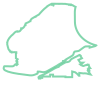

In [20]:
#check geometry boundary
zone_df.geometry[0].boundary

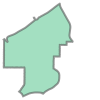

In [21]:
#check geometry
zone_df['geometry'][3]

### 4. Append Beat & Airport Beat info into new column "Beat_2", by using coordinates info column from original dataset, along with the JSON files from Atlanta ARCGIS Rest Server.

In [22]:
# now read in JSON file for the beat alignment
beat_df = gpd.read_file('https://services3.arcgis.com/Et5Qfajgiyosiw4d/arcgis/rest/services/2019_Beat_Alignment/FeatureServer/0/query?where=1=1&outFields=*&f=geojson')

In [23]:
beat_df

,FID,OBJECTID,BEAT,LENGTH,Shape__Are,Shape__Len,Shape__Area,Shape__Length,geometry
0,1,38,313,10.138702,1.170223e+08,53521.436180,1.573733e+07,19625.676294,"POLYGON ((-84.34967 33.68366, -84.34979 33.669..."
1,2,33,308,6.257904,4.798824e+07,33016.291484,6.458564e+06,12118.253869,"POLYGON ((-84.36065 33.70972, -84.36064 33.709..."
2,3,32,307,6.717766,4.712667e+07,35474.586859,6.343840e+06,13010.237000,"POLYGON ((-84.39665 33.71438, -84.39654 33.714..."
3,4,31,306,6.450164,4.565765e+07,34043.637503,6.146247e+06,12492.287873,"POLYGON ((-84.42213 33.71706, -84.42213 33.717..."
4,5,76,612,7.742413,4.123815e+07,40872.816675,5.555110e+06,14999.633482,"POLYGON ((-84.34544 33.74554, -84.34514 33.745..."
...,...,...,...,...,...,...,...,...,...
75,76,45,407,10.847838,1.105437e+08,57237.957637,1.489500e+07,21018.767168,"POLYGON ((-84.49547 33.75357, -84.49569 33.752..."
76,77,50,412,17.323297,1.621560e+08,91435.918180,2.183065e+07,33553.649688,"POLYGON ((-84.52965 33.73337, -84.52949 33.733..."
77,78,44,406,11.013085,1.217128e+08,58129.756179,1.639491e+07,21336.225069,"MULTIPOLYGON (((-84.49529 33.75356, -84.49529 ..."
78,79,77,613,9.462794,7.204575e+07,49953.262690,9.719614e+06,18346.753211,"POLYGON ((-84.35215 33.81682, -84.35215 33.816..."


In [24]:
# populating the matched beat info from JSON file
for i in range (len(beat_df.index)) :
    beat_mask = (beat_df['geometry'][i].contains(crime_df_final['coordinates']))
    crime_df_final.loc[beat_mask,['Beat_2']] = beat_df['BEAT'][i]

crime_df_final

,crime,number,date,location,beat,neighborhood,npu,lat,long,type,road,neighbourhood_lookup,city,county,state,postcode,country,coordinates,Zone,Beat_2
977,BURGLARY-NONRES,92742126.0,10/01/2009,878 PEACHTREE ST NE,505.0,Midtown,E,33.77880,-84.38438,building,Peachtree Street Northeast,Midtown,Atlanta,Fulton County,Georgia,30309.0,United States,POINT (-84.38438 33.7788),5.0,505.0
978,AGG ASSAULT,92742148.0,10/01/2009,1483 ARTHUR LANGFORD JR PL SW,307.0,Joyland,Y,33.71097,-84.39789,house_number,Upshaw Street Southwest,NaN,Atlanta,Fulton County,Georgia,30315.0,United States,POINT (-84.39789 33.71097),3.0,307.0
979,LARCENY-NON VEHICLE,92742214.0,10/01/2009,3750 CAMPBELLTON RD SW,413.0,NaN,P,33.69030,-84.51114,house_number,Fairburn Road Southwest,NaN,Atlanta,Fulton County,Georgia,30331.0,United States,POINT (-84.51114 33.6903),4.0,413.0
980,AGG ASSAULT,92742243.0,10/01/2009,902 DONALD LEE HOLLOWELL PKWY NW,103.0,English Avenue,L,33.77280,-84.41689,amenity,Donald Lee Hollowell Parkway Northwest,Bellwood,Atlanta,Fulton County,Georgia,30318.0,United States,POINT (-84.41689 33.7728),5.0,506.0
981,ROBBERY-PEDESTRIAN,92742248.0,10/01/2009,600 MEANS ST NW,504.0,Marietta Street Artery,E,33.77451,-84.40731,house_number,Means Street Northwest,Bellwood,Atlanta,Fulton County,Georgia,30318.0,United States,POINT (-84.40731 33.77451),5.0,504.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199525,LARCENY-FROM VEHICLE,130331481.0,02/02/2013,2125 NORTHSIDE DR NW,205.0,NaN,C,33.81356,-84.40761,leisure,Woodward Way Northwest,NaN,Atlanta,Fulton County,Georgia,30305.0,United States,POINT (-84.40761 33.81356),2.0,205.0
199526,AGG ASSAULT,130331505.0,02/02/2013,1870 CAMPBELLTON RD SW,408.0,NaN,R,33.70939,-84.44964,house_number,Campbellton Road Southwest,Adams Park,Atlanta,Fulton County,Georgia,30311.0,United States,POINT (-84.44964 33.70939),4.0,408.0
199527,LARCENY-NON VEHICLE,130331516.0,02/02/2013,946 MARTIN L KING JR DR SW,104.0,Ashview Heights,T,33.75438,-84.41827,amenity,Martin Luther King Jr Drive Southwest,Atlanta University Center,Atlanta,Fulton County,Georgia,30314.0,United States,POINT (-84.41827 33.75438),1.0,104.0
199528,BURGLARY-NONRES,130331535.0,02/02/2013,1387 NORTHSIDE DR NW,207.0,Loring Heights,E,33.79266,-84.40727,shop,Northside Drive Northwest,NaN,Atlanta,Fulton County,Georgia,30327.0,United States,POINT (-84.40727 33.79266),2.0,207.0


In [25]:
#read in JSON file for the airport beat alignment
airport_beat_df = gpd.read_file('https://services3.arcgis.com/Et5Qfajgiyosiw4d/ArcGIS/rest/services/Airport_Beats/FeatureServer/0/query?where=1=1&outFields=*&f=geojson')
airport_beat_df

,FID,GUID,ASSETID,NAME,PROJECTID,WORKBREAKD,AREA,STATUS,ALTERNATIV,USERFLAG,ACCURACY,DATEDATAAC,DATASOURCE,GlobalID,Shape__Area,Shape__Length,geometry
0,1,,,702,,,0,,0,,,NaN,,{9A1CA356-1992-4BD9-8F22-C097BD3ADFD3},8.720831e+07,68609.918221,"POLYGON ((-84.42199 33.64105, -84.40265 33.640..."
1,2,,,704,,,0,,0,,,NaN,,{7283A419-C222-4381-BDA9-2677010B2C9F},8.694810e+06,15171.160871,"POLYGON ((-84.45445 33.63988, -84.45335 33.639..."
2,3,,,706,,,0,,0,,,NaN,,{488F6D3B-D8E0-4543-AC10-EF3A96D4918F},8.056989e+05,3862.421777,"POLYGON ((-84.44232 33.64167, -84.44231 33.641..."
3,4,,,705,,,0,,0,,,NaN,,{761C066A-8950-48F7-A71A-96F9E9D428EE},6.502521e+06,12452.630384,"POLYGON ((-84.44295 33.64969, -84.44293 33.647..."
4,5,,,703,,,0,,0,,,NaN,,{85A8281D-1195-454A-92B7-B6D3C971FE85},1.534544e+07,17339.606898,"POLYGON ((-84.44233 33.64391, -84.44103 33.643..."
5,6,,,707,,,0,,0,,,NaN,,{1383764D-9BBF-4C7D-BAED-1469F6A1B3E5},9.463562e+06,18907.038257,"POLYGON ((-84.45191 33.64255, -84.45369 33.643..."
6,7,,,701,,,0,,0,,,NaN,,{F654EFEF-509D-4168-8FCB-355ED97ED61A},5.729184e+07,33574.552038,"POLYGON ((-84.42416 33.65881, -84.42018 33.658..."


In [26]:
# populating the matched airport beat info from JSON file
for i in range (len(airport_beat_df.index)) :
    beat_mask = (airport_beat_df['geometry'][i].contains(crime_df_final['coordinates']))
    crime_df_final.loc[beat_mask,['Beat_2']] = airport_beat_df['NAME'][i]

crime_df_final

,crime,number,date,location,beat,neighborhood,npu,lat,long,type,road,neighbourhood_lookup,city,county,state,postcode,country,coordinates,Zone,Beat_2
977,BURGLARY-NONRES,92742126.0,10/01/2009,878 PEACHTREE ST NE,505.0,Midtown,E,33.77880,-84.38438,building,Peachtree Street Northeast,Midtown,Atlanta,Fulton County,Georgia,30309.0,United States,POINT (-84.38438 33.7788),5.0,505.0
978,AGG ASSAULT,92742148.0,10/01/2009,1483 ARTHUR LANGFORD JR PL SW,307.0,Joyland,Y,33.71097,-84.39789,house_number,Upshaw Street Southwest,NaN,Atlanta,Fulton County,Georgia,30315.0,United States,POINT (-84.39789 33.71097),3.0,307.0
979,LARCENY-NON VEHICLE,92742214.0,10/01/2009,3750 CAMPBELLTON RD SW,413.0,NaN,P,33.69030,-84.51114,house_number,Fairburn Road Southwest,NaN,Atlanta,Fulton County,Georgia,30331.0,United States,POINT (-84.51114 33.6903),4.0,413.0
980,AGG ASSAULT,92742243.0,10/01/2009,902 DONALD LEE HOLLOWELL PKWY NW,103.0,English Avenue,L,33.77280,-84.41689,amenity,Donald Lee Hollowell Parkway Northwest,Bellwood,Atlanta,Fulton County,Georgia,30318.0,United States,POINT (-84.41689 33.7728),5.0,506.0
981,ROBBERY-PEDESTRIAN,92742248.0,10/01/2009,600 MEANS ST NW,504.0,Marietta Street Artery,E,33.77451,-84.40731,house_number,Means Street Northwest,Bellwood,Atlanta,Fulton County,Georgia,30318.0,United States,POINT (-84.40731 33.77451),5.0,504.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199525,LARCENY-FROM VEHICLE,130331481.0,02/02/2013,2125 NORTHSIDE DR NW,205.0,NaN,C,33.81356,-84.40761,leisure,Woodward Way Northwest,NaN,Atlanta,Fulton County,Georgia,30305.0,United States,POINT (-84.40761 33.81356),2.0,205.0
199526,AGG ASSAULT,130331505.0,02/02/2013,1870 CAMPBELLTON RD SW,408.0,NaN,R,33.70939,-84.44964,house_number,Campbellton Road Southwest,Adams Park,Atlanta,Fulton County,Georgia,30311.0,United States,POINT (-84.44964 33.70939),4.0,408.0
199527,LARCENY-NON VEHICLE,130331516.0,02/02/2013,946 MARTIN L KING JR DR SW,104.0,Ashview Heights,T,33.75438,-84.41827,amenity,Martin Luther King Jr Drive Southwest,Atlanta University Center,Atlanta,Fulton County,Georgia,30314.0,United States,POINT (-84.41827 33.75438),1.0,104.0
199528,BURGLARY-NONRES,130331535.0,02/02/2013,1387 NORTHSIDE DR NW,207.0,Loring Heights,E,33.79266,-84.40727,shop,Northside Drive Northwest,NaN,Atlanta,Fulton County,Georgia,30327.0,United States,POINT (-84.40727 33.79266),2.0,207.0


### 5. Due to discrepencies within the data, necessary steps and processes have been applied to the data. Especially the confusion between Zone 7 and Beat 700s, with Zone 50. The original dataset has lots of mix use of Beat 50 and Beat 700s. They are not identical area based on the map, however they are mostly overlapped. Based on the JSON file , the beat and airport beat layer. Zone 7 with Beat 700s has been decied to reprensent airport zoning.

In [27]:
#A quick check to see Beat_2 values, seems like 50 still exists. 
crime_df_final.Beat_2.unique()

array([505., 307., 413., 506., 504., 414., 405., 703., 204., 310., 304.,
       601., 311., 212., 508., 112., 102., 406., 110., 603., 207., 610.,
       609., 501., 106., 206., 305., 612., 404., 302., 606., 108., 502.,
       512., 401., 104., 410., 409., 210., 407., 503., 312., 303., 111.,
       208., 211., 403., 313., 509., 511., 107., 103., 109., 411., 613.,
       113., 607., 608., 205., 602., 408., 101., 604., 308., 412., 309.,
       605., 611., 301., 510., 402., 614., 306., 114., 209., 105., 507.,
       201., 202., 702., 701., 704., 705., 706., 707.,  nan,  50.,   0.])

In [28]:
# Check how many rows has beat info 50
crime_df_final[crime_df_final['Beat_2'] == 50]

,crime,number,date,location,beat,neighborhood,npu,lat,long,type,road,neighbourhood_lookup,city,county,state,postcode,country,coordinates,Zone,Beat_2
82315,AGG ASSAULT,121648064.0,06/21/2012,11700 SPINE RD,703.0,NaN,NaN,33.62505,-84.42445,road,Airport Loop Road,NaN,NaN,Clayton County,Georgia,30320.0,United States,POINT (-84.42445 33.62505),7.0,50.0
84945,LARCENY-NON VEHICLE,131768013.0,06/25/2013,4450 RIVERDALE RD,702.0,NaN,NaN,33.62875,-84.44773,road,Sullivan Road,NaN,NaN,Clayton County,Georgia,30337.0,United States,POINT (-84.44773 33.62875),7.0,50.0


In [29]:
#only two rows. now pass the orginal beat info of 700s into new beat_2 columns.
Beat_50_Mask = crime_df_final['Beat_2'] == 50

In [30]:
crime_df_final.loc[Beat_50_Mask,['Beat_2']] = crime_df_final[Beat_50_Mask]['beat']

In [31]:
#All clear now
crime_df_final[crime_df_final['Beat_2'] == 50]

,crime,number,date,location,beat,neighborhood,npu,lat,long,type,road,neighbourhood_lookup,city,county,state,postcode,country,coordinates,Zone,Beat_2


### example of all the discrepency in location columns

In [32]:

example = crime_df_final.loc[(crime_df_final["lat"]==33.62522)&(crime_df_final["long"]==-84.43082)]
example


,crime,number,date,location,beat,neighborhood,npu,lat,long,type,road,neighbourhood_lookup,city,county,state,postcode,country,coordinates,Zone,Beat_2
83358,LARCENY-FROM VEHICLE,121638018.0,06/11/2012,1255 SOUTH LOOP RD,702.0,NaN,NaN,33.62522,-84.43082,road,Airport Loop Road,NaN,NaN,Clayton County,Georgia,30320.0,United States,POINT (-84.43082 33.62522),7.0,702.0
109887,LARCENY-FROM VEHICLE,132028079.0,07/21/2013,1255 S LOOP RD,702.0,NaN,NaN,33.62522,-84.43082,road,Airport Loop Road,NaN,NaN,Clayton County,Georgia,30320.0,United States,POINT (-84.43082 33.62522),7.0,702.0
130472,LARCENY-NON VEHICLE,103128025.0,11/08/2010,1255 S LOOP RD @TECHNICAL SUPPORT CA,50.0,NaN,NaN,33.62522,-84.43082,road,Airport Loop Road,NaN,NaN,Clayton County,Georgia,30320.0,United States,POINT (-84.43082 33.62522),7.0,702.0
163920,LARCENY-FROM VEHICLE,93158035.0,11/11/2009,TECH CAMPUS @1255 S LOOP RD,50.0,NaN,NaN,33.62522,-84.43082,road,Airport Loop Road,NaN,NaN,Clayton County,Georgia,30320.0,United States,POINT (-84.43082 33.62522),7.0,702.0
193361,LARCENY-NON VEHICLE,100328060.0,02/01/2010,TECH CAMPUS @1255 S LOOP RD,50.0,NaN,NaN,33.62522,-84.43082,road,Airport Loop Road,NaN,NaN,Clayton County,Georgia,30320.0,United States,POINT (-84.43082 33.62522),7.0,702.0


In [33]:
#convert to appropriate type for processing 
#crime_df_final["beat"].str.strip()
#crime_df_final ["beat"] = crime_df_final ["beat"].replace (" " , "")
crime_df_final ["beat"] = crime_df_final["beat"].fillna(0)
crime_df_final = crime_df_final.astype({"beat":'int'})
crime_df_final ["Beat_2"] = crime_df_final["Beat_2"].fillna(0)
crime_df_final = crime_df_final.astype({"Beat_2":'int'})

In [34]:
#only 74 rows of data's beat info haven't been enriched by JSON file, however they all have orginal beat data, except for 1 row
crime_df_final [crime_df_final["Beat_2"] == 0] 

,crime,number,date,location,beat,neighborhood,npu,lat,long,type,road,neighbourhood_lookup,city,county,state,postcode,country,coordinates,Zone,Beat_2
108155,AGG ASSAULT,100151293.0,01/15/2010,MORELAND AVE SE / CONSTITUTION RD SE,308,NaN,NaN,33.69262,-84.34946,road,Moreland Avenue Southeast,NaN,Atlanta,Fulton County,Georgia,30315.0,United States,POINT (-84.34946 33.69262),NaN,0
235518,LARCENY-NON VEHICLE,132931028.0,10/20/2013,2191 COLLEGE AVE NE,610,NaN,NaN,33.76448,-84.31547,road,College Avenue Northeast,NaN,Atlanta,DeKalb County,Georgia,30317.0,United States,POINT (-84.31547 33.76448),NaN,0
235677,BURGLARY-NONRES,152930630.0,10/20/2015,2197 COLLEGE AVE NE,610,NaN,NaN,33.76451,-84.31531,house_number,College Avenue Northeast,NaN,Atlanta,DeKalb County,Georgia,30317.0,United States,POINT (-84.31531 33.76451),NaN,0
218,AGG ASSAULT,140570281.0,02/26/2014,1177 CONSTITUTION RD SE,308,NaN,NaN,33.69262,-84.34946,road,Moreland Avenue Southeast,NaN,Atlanta,Fulton County,Georgia,30315.0,United States,POINT (-84.34946 33.69262),NaN,0
9413,AUTO THEFT,90421063.0,02/11/2009,227 HUNNICUTT ST NW,506,NaN,NaN,33.71028,-84.54851,house_number,Lyon Avenue,NaN,NaN,Fulton County,Georgia,30331.0,United States,POINT (-84.54851 33.71028),NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185063,BURGLARY-RESIDENCE,93581496.0,12/24/2009,2810 RIDGEVIEW DR SW,411,Greenbriar,R,33.66893,-84.49204,house_number,Ridgeview Drive,NaN,Atlanta,Fulton County,Georgia,30331.0,United States,POINT (-84.49204 33.66893),NaN,0
189848,BURGLARY-RESIDENCE,90130723.0,01/13/2009,2806 RIDGEVIEW DR SW,408,Greenbriar,NaN,33.66904,-84.49203,house_number,Ridgeview Drive,NaN,Atlanta,Fulton County,Georgia,30331.0,United States,POINT (-84.49203 33.66904),NaN,0
190968,BURGLARY-RESIDENCE,90040893.0,01/04/2009,2806 RIDGEVIEW DR SW,408,Greenbriar,NaN,33.66904,-84.49203,house_number,Ridgeview Drive,NaN,Atlanta,Fulton County,Georgia,30331.0,United States,POINT (-84.49203 33.66904),NaN,0
194232,AUTO THEFT,110491007.0,02/18/2011,ARTHUR LANGFORD EB PKWY SW / DELOWE DR SW,410,Campbellton Road,NaN,33.69926,-84.45734,house_number,Delowe Drive,NaN,Atlanta,Fulton County,Georgia,30344.0,United States,POINT (-84.45734 33.69926),NaN,0


In [35]:
crime_df_final.dtypes

crime                    object
number                  float64
date                     object
location                 object
beat                      int32
neighborhood             object
npu                      object
lat                     float64
long                    float64
type                     object
road                     object
neighbourhood_lookup     object
city                     object
county                   object
state                    object
postcode                float64
country                  object
coordinates              object
Zone                    float64
Beat_2                    int32
dtype: object

In [36]:
#upon checking ,orginal beat data has a lot less accuracy comparing with the new beat data enriched from JSON file. also lots of comfusion between beat 50 / beat 700s
difference_mask = crime_df_final["beat"] != crime_df_final["Beat_2"]
sum(difference_mask)

13723

In [37]:
crime_df_final[difference_mask]

,crime,number,date,location,beat,neighborhood,npu,lat,long,type,road,neighbourhood_lookup,city,county,state,postcode,country,coordinates,Zone,Beat_2
980,AGG ASSAULT,92742243.0,10/01/2009,902 DONALD LEE HOLLOWELL PKWY NW,103,English Avenue,L,33.77280,-84.41689,amenity,Donald Lee Hollowell Parkway Northwest,Bellwood,Atlanta,Fulton County,Georgia,30318.0,United States,POINT (-84.41689 33.7728),5.0,506
985,LARCENY-NON VEHICLE,92748043.0,10/01/2009,10700 SPINE RD,50,NaN,NaN,33.64083,-84.43197,aeroway,North Terminal Parkway,NaN,Atlanta,Clayton County,Georgia,30337.0,United States,POINT (-84.43197 33.64083),7.0,703
2345,LARCENY-FROM VEHICLE,92751674.0,10/02/2009,2040 MAIN ST NW,203,Riverside,D,33.81146,-84.47229,house_number,Main Street Northwest,Riverside,Atlanta,Fulton County,Georgia,30318.0,United States,POINT (-84.47229 33.81146),1.0,103
2352,LARCENY-NON VEHICLE,92752008.0,10/02/2009,560 DUTCH VALLEY RD NE,213,Morningside/Lenox Park,F,33.79216,-84.36886,house_number,Dutch Valley Road Northeast,NaN,Atlanta,Fulton County,Georgia,30324.0,United States,POINT (-84.36886 33.79216),6.0,613
2358,LARCENY-NON VEHICLE,92752112.0,10/02/2009,343 PAINES AVE NW,103,English Avenue,L,33.76394,-84.41450,house_number,Paines Avenue Northwest,English Ave.,Atlanta,Fulton County,Georgia,30314.0,United States,POINT (-84.4145 33.76394),5.0,506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199468,LARCENY-FROM VEHICLE,130341805.0,02/03/2013,332 PONCE DE LEON AVE NE,506,Midtown,E,33.77269,-84.37643,house_number,Ponce de Leon Avenue Northeast,NaN,Atlanta,Fulton County,Georgia,30308.0,United States,POINT (-84.37643 33.77269),6.0,614
199474,ROBBERY-PEDESTRIAN,130342042.0,02/03/2013,140 PINE ST.,509,Downtown,M,33.76750,-84.38202,house_number,Piedmont Avenue Northeast,Hotel District,Atlanta,Fulton County,Georgia,30308.0,United States,POINT (-84.38202 33.7675),6.0,603
199481,ROBBERY-PEDESTRIAN,130342139.0,02/03/2013,650 PONCE DE LEON AVE NE,506,Midtown,E,33.77469,-84.36561,shop,Atlanta BeltLine Eastside Trail,NaN,Atlanta,Fulton County,Georgia,30308.0,United States,POINT (-84.36561 33.77469),6.0,614
199506,AUTO THEFT,130330987.0,02/02/2013,2591 ETHERIDGE CT,109,Carey Park,G,33.79092,-84.47306,house_number,Tower Hill Street Northwest,NaN,Atlanta,Fulton County,Georgia,30318.0,United States,POINT (-84.47306 33.79092),1.0,113


In [38]:
#74 entries of data without newly enriched beat info from JSON file
crime_df_final [crime_df_final["Beat_2"] == 0]["Beat_2"] 

108155    0
235518    0
235677    0
218       0
9413      0
         ..
185063    0
189848    0
190968    0
194232    0
198481    0
Name: Beat_2, Length: 74, dtype: int32

In [39]:
#populated all these empty entry with orginal beat info. 
crime_df_final["Beat_2"] = np.where(crime_df_final["Beat_2"] == 0, crime_df_final["beat"], crime_df_final["Beat_2"])

In [40]:
#only one row has no beat file in both beat columns, out of 225001 rows, 
crime_df_final [crime_df_final["Beat_2"] == 0]

,crime,number,date,location,beat,neighborhood,npu,lat,long,type,road,neighbourhood_lookup,city,county,state,postcode,country,coordinates,Zone,Beat_2
129845,AUTO THEFT,103171426.0,11/13/2010,3254 GLENWOOD AVENUE,0,NaN,NaN,33.73905,-84.28641,house_number,Ellington Street,Glenwood Hills,NaN,DeKalb County,Georgia,30032.0,United States,POINT (-84.28641 33.73905),NaN,0


In [41]:
crime_df_final = crime_df_final[crime_df_final.Beat_2 != 0]

In [42]:
crime_df_final

,crime,number,date,location,beat,neighborhood,npu,lat,long,type,road,neighbourhood_lookup,city,county,state,postcode,country,coordinates,Zone,Beat_2
977,BURGLARY-NONRES,92742126.0,10/01/2009,878 PEACHTREE ST NE,505,Midtown,E,33.77880,-84.38438,building,Peachtree Street Northeast,Midtown,Atlanta,Fulton County,Georgia,30309.0,United States,POINT (-84.38438 33.7788),5.0,505
978,AGG ASSAULT,92742148.0,10/01/2009,1483 ARTHUR LANGFORD JR PL SW,307,Joyland,Y,33.71097,-84.39789,house_number,Upshaw Street Southwest,NaN,Atlanta,Fulton County,Georgia,30315.0,United States,POINT (-84.39789 33.71097),3.0,307
979,LARCENY-NON VEHICLE,92742214.0,10/01/2009,3750 CAMPBELLTON RD SW,413,NaN,P,33.69030,-84.51114,house_number,Fairburn Road Southwest,NaN,Atlanta,Fulton County,Georgia,30331.0,United States,POINT (-84.51114 33.6903),4.0,413
980,AGG ASSAULT,92742243.0,10/01/2009,902 DONALD LEE HOLLOWELL PKWY NW,103,English Avenue,L,33.77280,-84.41689,amenity,Donald Lee Hollowell Parkway Northwest,Bellwood,Atlanta,Fulton County,Georgia,30318.0,United States,POINT (-84.41689 33.7728),5.0,506
981,ROBBERY-PEDESTRIAN,92742248.0,10/01/2009,600 MEANS ST NW,504,Marietta Street Artery,E,33.77451,-84.40731,house_number,Means Street Northwest,Bellwood,Atlanta,Fulton County,Georgia,30318.0,United States,POINT (-84.40731 33.77451),5.0,504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199525,LARCENY-FROM VEHICLE,130331481.0,02/02/2013,2125 NORTHSIDE DR NW,205,NaN,C,33.81356,-84.40761,leisure,Woodward Way Northwest,NaN,Atlanta,Fulton County,Georgia,30305.0,United States,POINT (-84.40761 33.81356),2.0,205
199526,AGG ASSAULT,130331505.0,02/02/2013,1870 CAMPBELLTON RD SW,408,NaN,R,33.70939,-84.44964,house_number,Campbellton Road Southwest,Adams Park,Atlanta,Fulton County,Georgia,30311.0,United States,POINT (-84.44964 33.70939),4.0,408
199527,LARCENY-NON VEHICLE,130331516.0,02/02/2013,946 MARTIN L KING JR DR SW,104,Ashview Heights,T,33.75438,-84.41827,amenity,Martin Luther King Jr Drive Southwest,Atlanta University Center,Atlanta,Fulton County,Georgia,30314.0,United States,POINT (-84.41827 33.75438),1.0,104
199528,BURGLARY-NONRES,130331535.0,02/02/2013,1387 NORTHSIDE DR NW,207,Loring Heights,E,33.79266,-84.40727,shop,Northside Drive Northwest,NaN,Atlanta,Fulton County,Georgia,30327.0,United States,POINT (-84.40727 33.79266),2.0,207


### There are 125 rows of crime cases has no ZONE info, after being enriched by JSON. However the Zone info can be derived from the Beat info, Python function has been created to further finalized the missing zone info. 

In [46]:

# 125 rows has no zone info . 
crime_df_final ["Zone"] = crime_df_final["Zone"].fillna(0)
crime_df_final = crime_df_final.astype({"Zone":'int'})
crime_df_final [crime_df_final["Zone"] == 0]


,crime,number,date,location,beat,neighborhood,npu,lat,long,type,road,neighbourhood_lookup,city,county,state,postcode,country,coordinates,Zone,Beat_2


In [47]:
## fill in missing zone data based on beat info from beat_2 column, floor division. for example. beat 201 --- zone 2. 
## Lots of them due to boarder classification issue
crime_df_final["Zone"] = np.where(crime_df_final["Zone"] == 0, crime_df_final["Beat_2"]//100, crime_df_final["Zone"])

In [48]:
crime_df_final[crime_df_final["number"] == 130460779]

,crime,number,date,location,beat,neighborhood,npu,lat,long,type,road,neighbourhood_lookup,city,county,state,postcode,country,coordinates,Zone,Beat_2
198481,LARCENY-FROM VEHICLE,130460779.0,02/15/2013,2045 GRAHAM CIR SE,612,NaN,NaN,33.72702,-84.32212,house_number,Graham Circle Southeast,NaN,NaN,DeKalb County,Georgia,30316.0,United States,POINT (-84.32212 33.72702),6,612


In [49]:
#checking both zone and beat_2 columns have info in every row
crime_df_final.loc[(crime_df_final["Zone"] == 0) | (crime_df_final["Beat_2"] == 0 )]

,crime,number,date,location,beat,neighborhood,npu,lat,long,type,road,neighbourhood_lookup,city,county,state,postcode,country,coordinates,Zone,Beat_2


In [50]:
#drop the original beat column
crime_df_final = crime_df_final.drop('beat', axis=1,errors='ignore')

In [51]:
crime_df_final

,crime,number,date,location,neighborhood,npu,lat,long,type,road,neighbourhood_lookup,city,county,state,postcode,country,coordinates,Zone,Beat_2
977,BURGLARY-NONRES,92742126.0,10/01/2009,878 PEACHTREE ST NE,Midtown,E,33.77880,-84.38438,building,Peachtree Street Northeast,Midtown,Atlanta,Fulton County,Georgia,30309.0,United States,POINT (-84.38438 33.7788),5,505
978,AGG ASSAULT,92742148.0,10/01/2009,1483 ARTHUR LANGFORD JR PL SW,Joyland,Y,33.71097,-84.39789,house_number,Upshaw Street Southwest,NaN,Atlanta,Fulton County,Georgia,30315.0,United States,POINT (-84.39789 33.71097),3,307
979,LARCENY-NON VEHICLE,92742214.0,10/01/2009,3750 CAMPBELLTON RD SW,NaN,P,33.69030,-84.51114,house_number,Fairburn Road Southwest,NaN,Atlanta,Fulton County,Georgia,30331.0,United States,POINT (-84.51114 33.6903),4,413
980,AGG ASSAULT,92742243.0,10/01/2009,902 DONALD LEE HOLLOWELL PKWY NW,English Avenue,L,33.77280,-84.41689,amenity,Donald Lee Hollowell Parkway Northwest,Bellwood,Atlanta,Fulton County,Georgia,30318.0,United States,POINT (-84.41689 33.7728),5,506
981,ROBBERY-PEDESTRIAN,92742248.0,10/01/2009,600 MEANS ST NW,Marietta Street Artery,E,33.77451,-84.40731,house_number,Means Street Northwest,Bellwood,Atlanta,Fulton County,Georgia,30318.0,United States,POINT (-84.40731 33.77451),5,504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199525,LARCENY-FROM VEHICLE,130331481.0,02/02/2013,2125 NORTHSIDE DR NW,NaN,C,33.81356,-84.40761,leisure,Woodward Way Northwest,NaN,Atlanta,Fulton County,Georgia,30305.0,United States,POINT (-84.40761 33.81356),2,205
199526,AGG ASSAULT,130331505.0,02/02/2013,1870 CAMPBELLTON RD SW,NaN,R,33.70939,-84.44964,house_number,Campbellton Road Southwest,Adams Park,Atlanta,Fulton County,Georgia,30311.0,United States,POINT (-84.44964 33.70939),4,408
199527,LARCENY-NON VEHICLE,130331516.0,02/02/2013,946 MARTIN L KING JR DR SW,Ashview Heights,T,33.75438,-84.41827,amenity,Martin Luther King Jr Drive Southwest,Atlanta University Center,Atlanta,Fulton County,Georgia,30314.0,United States,POINT (-84.41827 33.75438),1,104
199528,BURGLARY-NONRES,130331535.0,02/02/2013,1387 NORTHSIDE DR NW,Loring Heights,E,33.79266,-84.40727,shop,Northside Drive Northwest,NaN,Atlanta,Fulton County,Georgia,30327.0,United States,POINT (-84.40727 33.79266),2,207


### 7. Creating unique keys for each combination of the lat and long. In order to create Lat/Long dimension table

In [54]:
# factorise, assign surrogate key to coordinates tuple 
crime_df_final['coordinate_ID'] = pd.factorize(list(zip(crime_df_final.lat.values, crime_df_final.long.values)))[0]+1
crime_df_final

#checking how many unique coordinates tuples locations
crime_df_final['coordinate_ID'].nunique()
crime_df_final['coordinates'].nunique()


63669

### 8. Checking city columns, there are 2039 out of 225,000 (less than 1%) data entry has no city info, and only one entry listed "Sandy Springs" as city. However upon checking ,the coordinate lies on the city boundary of Atlanta, so here the data has been included in our analysis for Atlanta crimes. Regarding all the nan values, the city Atlanta has been added in, even the airport zone is not in the city boundary, however most of the airport zone coordinates has Atlanta as city already, and the data set was about crimes in Atlanta. 

In [55]:
#2039 rows has no city info
sum(crime_df_final['city'].isnull())

2039

In [56]:
#checking the city info, only 1 entry is "Sandy Springs", the rest are Atlanta or Null
crime_df_final[(crime_df_final['city'] != "Atlanta") & (crime_df_final['city'].notnull())]

,crime,number,date,location,neighborhood,npu,lat,long,type,road,neighbourhood_lookup,city,county,state,postcode,country,coordinates,Zone,Beat_2,coordinate_ID
144939,AUTO THEFT,163281817.0,11/23/2016,4 WHITEWATER TRL NW,Whitewater Creek,A,33.87957,-84.43944,road,East Palisades,NaN,Sandy Springs,Fulton County,Georgia,30339.0,United States,POINT (-84.43944 33.87957),2,202,54175


In [57]:
#made decision to assign Atlanta to all the empty city cell, they are all from 700 airport zone 7, technically they don't belong to Atlanta city from the map, however a lot more other airport zone location has been assigned 
#with Atlanta info already. plus the data set description demonstrated it is crime data from Atlanta city.  
crime_df_final['city'] = np.where((crime_df_final['city'] != "Atlanta") | (crime_df_final['city'].isnull()), "Atlanta", crime_df_final['city'])

In [58]:
crime_df_final.city.unique()

array(['Atlanta'], dtype=object)

### 9 . Creating unique keys for each beat + zone combination, then create beat dimension table which has beat - zone - city hierarchy, then export to CSV.

In [59]:
crime_df_final['beat_ID'] = pd.factorize(list(zip(crime_df_final.Beat_2.values, crime_df_final.Zone.values)))[0]+1
crime_df_final

,crime,number,date,location,neighborhood,npu,lat,long,type,road,...,city,county,state,postcode,country,coordinates,Zone,Beat_2,coordinate_ID,beat_ID
977,BURGLARY-NONRES,92742126.0,10/01/2009,878 PEACHTREE ST NE,Midtown,E,33.77880,-84.38438,building,Peachtree Street Northeast,...,Atlanta,Fulton County,Georgia,30309.0,United States,POINT (-84.38438 33.7788),5,505,1,1
978,AGG ASSAULT,92742148.0,10/01/2009,1483 ARTHUR LANGFORD JR PL SW,Joyland,Y,33.71097,-84.39789,house_number,Upshaw Street Southwest,...,Atlanta,Fulton County,Georgia,30315.0,United States,POINT (-84.39789 33.71097),3,307,2,2
979,LARCENY-NON VEHICLE,92742214.0,10/01/2009,3750 CAMPBELLTON RD SW,NaN,P,33.69030,-84.51114,house_number,Fairburn Road Southwest,...,Atlanta,Fulton County,Georgia,30331.0,United States,POINT (-84.51114 33.6903),4,413,3,3
980,AGG ASSAULT,92742243.0,10/01/2009,902 DONALD LEE HOLLOWELL PKWY NW,English Avenue,L,33.77280,-84.41689,amenity,Donald Lee Hollowell Parkway Northwest,...,Atlanta,Fulton County,Georgia,30318.0,United States,POINT (-84.41689 33.7728),5,506,4,4
981,ROBBERY-PEDESTRIAN,92742248.0,10/01/2009,600 MEANS ST NW,Marietta Street Artery,E,33.77451,-84.40731,house_number,Means Street Northwest,...,Atlanta,Fulton County,Georgia,30318.0,United States,POINT (-84.40731 33.77451),5,504,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199525,LARCENY-FROM VEHICLE,130331481.0,02/02/2013,2125 NORTHSIDE DR NW,NaN,C,33.81356,-84.40761,leisure,Woodward Way Northwest,...,Atlanta,Fulton County,Georgia,30305.0,United States,POINT (-84.40761 33.81356),2,205,4436,59
199526,AGG ASSAULT,130331505.0,02/02/2013,1870 CAMPBELLTON RD SW,NaN,R,33.70939,-84.44964,house_number,Campbellton Road Southwest,...,Atlanta,Fulton County,Georgia,30311.0,United States,POINT (-84.44964 33.70939),4,408,181,61
199527,LARCENY-NON VEHICLE,130331516.0,02/02/2013,946 MARTIN L KING JR DR SW,Ashview Heights,T,33.75438,-84.41827,amenity,Martin Luther King Jr Drive Southwest,...,Atlanta,Fulton County,Georgia,30314.0,United States,POINT (-84.41827 33.75438),1,104,18695,36
199528,BURGLARY-NONRES,130331535.0,02/02/2013,1387 NORTHSIDE DR NW,Loring Heights,E,33.79266,-84.40727,shop,Northside Drive Northwest,...,Atlanta,Fulton County,Georgia,30327.0,United States,POINT (-84.40727 33.79266),2,207,8263,21


In [60]:
beat_dim = crime_df_final[["beat_ID","Beat_2","Zone","city"]].drop_duplicates()
beat_dim

,beat_ID,Beat_2,Zone,city
977,1,505,5,Atlanta
978,2,307,3,Atlanta
979,3,413,4,Atlanta
980,4,506,5,Atlanta
981,5,504,5,Atlanta
...,...,...,...,...
15658,82,704,7,Atlanta
17965,83,705,7,Atlanta
26458,84,706,7,Atlanta
27533,85,707,7,Atlanta


In [ ]:
beat_dim.to_csv("dim_beat.csv",index=False,header=False,sep='|')

## 10. A date creator function has been created, in order to generate a date Dimension, and Date keys, which is the combination of date-month-year. The function automatically populate information for each hierarchy.

In [62]:
#Define a date function to create date dimension table, based on earliest data entry and latest date record in dataset 2009-2017
def create_date_table(start='2009-01-01', end='2017-12-31'):
    df = pd.DataFrame({"Date": pd.date_range(start, end)})
    df["Day_of_week"] = df.Date.dt.dayofweek
    df["Day"] = df.Date.dt.day_name()
    df['Weekday_Weekend'] = np.where((df['Day_of_week']) < 5,"Weekday","Weekend")
    df["Month"] = df.Date.dt.month_name().str.slice(stop=3)
    df["Quarter"] = df.Date.dt.quarter
    df["Year"] = df.Date.dt.year
    return df

In [63]:
date_dim = create_date_table()
date_dim["Date_id"] =date_dim['Date'].dt.strftime('%Y%m%d')
date_dim_1 = date_dim.reindex(columns=['Date_id', 'Date', 'Day','Weekday_Weekend','Month','Quarter','Year'])

In [ ]:
date_dim_1

In [ ]:
#export date dimension table
date_dim_1.to_csv('date_dim.csv',index=False,header=False,sep='|')

## 11. Enrich neighborhood info from JSON file found on Atlanta Gov ARCGIS REST Server.

In [64]:
#Found neiboughood JSON file too, use this formal Json file to update the neiboughood column as lots of info were missing
neighborhood_df = gpd.read_file('https://gis.atlantaga.gov/dpcd/rest/services/OpenDataService/FeatureServer/3/query?where=1=1&outFields=*&f=geojson')
neighborhood_df

,OBJECTID,LOCALID,NAME,GEOTYPE,FULLFIPS,LEGALAREA,EFFECTDATE,ENDDATE,SRCREF,ACRES,SQMILES,OLDNAME,NPU,CREATED_USER,CREATED_DATE,LAST_EDITED_USER,LAST_EDITED_DATE,GLOBALID,geometry
0,148,NaN,Atlanta University Center,Neighborhood,NaN,NaN,NaN,NaN,NaN,331.57,0.52,Atlanta University,T,NaN,NaN,GIS,1653406700000,{D6CAF694-B83F-4CB9-B351-CA3E3145D0C7},"POLYGON ((-84.40280 33.75465, -84.40419 33.754..."
1,149,NaN,Hunter Hills,Neighborhood,NaN,NaN,NaN,NaN,NaN,322.58,0.50,Hunter Hills,K,NaN,NaN,GIS,1653406700000,{8A4F3C84-CCC3-478C-82BA-7E4174935428},"POLYGON ((-84.43297 33.76356, -84.43771 33.763..."
2,150,NaN,Historic Westin Heights/Bankhead,Neighborhood,NaN,NaN,NaN,NaN,NaN,416.09,0.65,Bankhead,K,NaN,NaN,GIS,1653406700000,{70303C29-B16F-4E33-9FEC-A33B2244D3AB},"POLYGON ((-84.41735 33.77561, -84.42597 33.775..."
3,151,NaN,English Avenue,Neighborhood,NaN,NaN,NaN,NaN,NaN,519.00,0.81,English Avenue,L,NaN,NaN,GIS,1653406700000,{9B6F9DF9-B38E-46FB-993B-4D1DA42AC049},"POLYGON ((-84.41445 33.78126, -84.41732 33.783..."
4,152,NaN,Adair Park,Neighborhood,NaN,NaN,NaN,NaN,NaN,289.28,0.45,Adair Park,V,NaN,NaN,GIS,1653406700000,{D8FD5CB2-4D90-4EEB-A33A-B52E6D66E345},"POLYGON ((-84.40819 33.73929, -84.40815 33.742..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,167,NaN,Greenbriar,Neighborhood,NaN,NaN,NaN,NaN,NaN,655.27,1.02,Greenbriar,R,NaN,NaN,GIS,1653410755000,{03870B67-64B1-4A40-ADFB-85C5A5D8211B},"POLYGON ((-84.49391 33.67486, -84.49390 33.678..."
244,249,NaN,East Atlanta,Neighborhood,NaN,NaN,NaN,NaN,NaN,931.53,1.46,East Atlanta,W,NaN,NaN,GIS,1666800153000,{574B2215-C2CA-4719-B687-D6FA8D201AAC},"POLYGON ((-84.34434 33.74559, -84.34695 33.745..."
245,248,NaN,Morningside/Lenox Park,Neighborhood,NaN,NaN,NaN,NaN,NaN,1445.95,2.26,Morningside-Lenox Park,F,NaN,NaN,GIS,1676994700000,{0F0F81DD-5048-41DF-976F-9D82C35C6B0D},"POLYGON ((-84.34859 33.80455, -84.34862 33.805..."
246,244,NaN,East Lake,Neighborhood,NaN,NaN,NaN,NaN,NaN,782.74,1.22,East Lake,O,NaN,NaN,GIS,1676994875000,{FA809309-67D3-459E-9D67-FB1AC9F689E6},"POLYGON ((-84.29041 33.74653, -84.29064 33.747..."


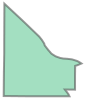

In [65]:
neighborhood_df.geometry[3]

In [66]:
crime_df_final['point_obj'] = [Point(xy) for xy in zip(crime_df_final.long, crime_df_final.lat)] 

for i in range (len(neighborhood_df.index)) :
    neighborhood_mask = (neighborhood_df['geometry'][i].contains(crime_df_final['point_obj']))
    crime_df_final.loc[neighborhood_mask,['Neighborhood']] = neighborhood_df['NAME'][i]


crime_df_final


,crime,number,date,location,neighborhood,npu,lat,long,type,road,...,state,postcode,country,coordinates,Zone,Beat_2,coordinate_ID,beat_ID,point_obj,Neighborhood
977,BURGLARY-NONRES,92742126.0,10/01/2009,878 PEACHTREE ST NE,Midtown,E,33.77880,-84.38438,building,Peachtree Street Northeast,...,Georgia,30309.0,United States,POINT (-84.38438 33.7788),5,505,1,1,POINT (-84.38438 33.7788),Midtown
978,AGG ASSAULT,92742148.0,10/01/2009,1483 ARTHUR LANGFORD JR PL SW,Joyland,Y,33.71097,-84.39789,house_number,Upshaw Street Southwest,...,Georgia,30315.0,United States,POINT (-84.39789 33.71097),3,307,2,2,POINT (-84.39789 33.71097),Joyland
979,LARCENY-NON VEHICLE,92742214.0,10/01/2009,3750 CAMPBELLTON RD SW,NaN,P,33.69030,-84.51114,house_number,Fairburn Road Southwest,...,Georgia,30331.0,United States,POINT (-84.51114 33.6903),4,413,3,3,POINT (-84.51114 33.6903),NaN
980,AGG ASSAULT,92742243.0,10/01/2009,902 DONALD LEE HOLLOWELL PKWY NW,English Avenue,L,33.77280,-84.41689,amenity,Donald Lee Hollowell Parkway Northwest,...,Georgia,30318.0,United States,POINT (-84.41689 33.7728),5,506,4,4,POINT (-84.41689 33.7728),English Avenue
981,ROBBERY-PEDESTRIAN,92742248.0,10/01/2009,600 MEANS ST NW,Marietta Street Artery,E,33.77451,-84.40731,house_number,Means Street Northwest,...,Georgia,30318.0,United States,POINT (-84.40731 33.77451),5,504,5,5,POINT (-84.40731 33.77451),Marietta Street Artery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199525,LARCENY-FROM VEHICLE,130331481.0,02/02/2013,2125 NORTHSIDE DR NW,NaN,C,33.81356,-84.40761,leisure,Woodward Way Northwest,...,Georgia,30305.0,United States,POINT (-84.40761 33.81356),2,205,4436,59,POINT (-84.40761 33.81356),NaN
199526,AGG ASSAULT,130331505.0,02/02/2013,1870 CAMPBELLTON RD SW,NaN,R,33.70939,-84.44964,house_number,Campbellton Road Southwest,...,Georgia,30311.0,United States,POINT (-84.44964 33.70939),4,408,181,61,POINT (-84.44964 33.70939),NaN
199527,LARCENY-NON VEHICLE,130331516.0,02/02/2013,946 MARTIN L KING JR DR SW,Ashview Heights,T,33.75438,-84.41827,amenity,Martin Luther King Jr Drive Southwest,...,Georgia,30314.0,United States,POINT (-84.41827 33.75438),1,104,18695,36,POINT (-84.41827 33.75438),Ashview Heights
199528,BURGLARY-NONRES,130331535.0,02/02/2013,1387 NORTHSIDE DR NW,Loring Heights,E,33.79266,-84.40727,shop,Northside Drive Northwest,...,Georgia,30327.0,United States,POINT (-84.40727 33.79266),2,207,8263,21,POINT (-84.40727 33.79266),Loring Heights


### 12. Loading data from the Atlanta Official Statistic website, which has listed each neighborhood total population in 2017, and the population of each race composition. In order to have some demographic insight for each NPU (Neighborhood Planning Unit), a python function has been created, to combine, and group all the population figures of suburbs into NPU level groups, then calculation the percentage of each race, for each NPU. For the ease of set group hierarchy, the demography statistic has been group into the following 4 groups, across the NPU level:
### People of Color Population Percentage in each NPU.
### (0% ~ 25%], (25% ~ 50%], (50% ~ 75%], (75% ~ 100%] 

In [69]:
# use stats data downloaded from Georgia Gov to add in a bit more info regarding the NPU demographic. 
STATS_DATA = "City_of_Atlanta_Neighborhood_Statistical_Areas.csv" 

In [70]:
with open (parent_path/STATS_DATA, newline = '') as file:
    stats_df = pd.read_csv(file, skipinitialspace=True)
    
stats_df.head(10)

,ï»¿OBJECTID,NPU,STATISTICA,POP2010,NEIGHBORHO,URL,A,pop,white,black,asian,other,hispanic,GlobalID,last_edited_date
0,1,NPU C,C04,2672,"Arden/Habersham, Argonne Forest, Peachtree Bat...",http://documents.atlantaregional.com/AtlantaPr...,"Arden/Habersham, Argonne Forest, Peachtree Bat...",2672,96.3,0.9,1.0,0.5,1.3,{6018B100-48DF-4B88-85B7-C4095D15897D},NaN
1,2,NPU B,B10,3736,"Peachtree Heights East, Peachtree Hills",http://documents.atlantaregional.com/AtlantaPr...,"Peachtree Heights East, Peachtree Hills",3736,86.6,5.9,2.0,1.8,3.7,{FA9A3ABB-FA59-43CD-92A8-B3BFCA21CB1D},NaN
2,3,NPU B,B01,4874,Peachtree Heights West,http://documents.atlantaregional.com/AtlantaPr...,Peachtree Heights West,4874,77.0,14.5,2.9,2.0,3.6,{405F0DA9-A4EE-4394-A4D9-B502065504DF},NaN
3,4,NPU B,B02,3372,"Buckhead Forest, South Tuxedo Park",http://documents.atlantaregional.com/AtlantaPr...,"Buckhead Forest, South Tuxedo Park",3372,77.5,9.0,3.5,2.0,8.1,{CF68D35A-64DD-4711-A9F3-A5CA932168AF},NaN
4,5,NPU A,A03,3423,"Chastain Park, Tuxedo Park",http://documents.atlantaregional.com/AtlantaPr...,"Chastain Park, Tuxedo Park",3423,93.8,0.7,2.6,1.1,1.8,{63D6A42F-7787-452A-BF77-56102A6C955F},NaN
5,6,NPU B,B03,2092,East Chastain Park,http://documents.atlantaregional.com/AtlantaPr...,East Chastain Park,2092,85.0,6.5,4.0,1.8,2.7,{333FD0AB-7129-4EA1-B56A-FB01CC1F2034},NaN
6,7,NPU B,B09,3584,Garden Hills,http://documents.atlantaregional.com/AtlantaPr...,Garden Hills,3584,71.4,6.1,4.4,2.6,15.5,{633E69EE-50C3-4EF7-9D58-5BF55E28610B},NaN
7,8,NPU B,B11,4604,Lindbergh/Morosgo,http://documents.atlantaregional.com/AtlantaPr...,Lindbergh/Morosgo,4604,34.4,24.9,9.5,2.3,28.8,{4E1D60DE-23C3-4459-8EC9-0B24DADB0D42},NaN
8,9,NPU B,B07,2920,"Buckhead Village, Peachtree Park",http://documents.atlantaregional.com/AtlantaPr...,"Buckhead Village, Peachtree Park",2920,77.4,11.1,3.1,2.3,6.2,{9D5679D0-ADB1-49CB-9538-6D82C744F669},NaN
9,10,NPU L,L01,2818,Vine City,http://documents.atlantaregional.com/AtlantaPr...,Vine City,2818,2.2,92.7,0.3,2.2,2.6,{50ECE773-3A06-4E7A-ACEE-B16D58D9DEAC},NaN


In [85]:
stats_df. iloc[:, [1,2,3,4,7,8,9,10,11,12]]

,NPU,STATISTICA,POP2010,NEIGHBORHO,pop,white,black,asian,other,hispanic
0,NPU C,C04,2672,"Arden/Habersham, Argonne Forest, Peachtree Bat...",2672,2573.136,24.048,26.720,13.360,34.736
1,NPU B,B10,3736,"Peachtree Heights East, Peachtree Hills",3736,3235.376,220.424,74.720,67.248,138.232
2,NPU B,B01,4874,Peachtree Heights West,4874,3752.980,706.730,141.346,97.480,175.464
3,NPU B,B02,3372,"Buckhead Forest, South Tuxedo Park",3372,2613.300,303.480,118.020,67.440,273.132
4,NPU A,A03,3423,"Chastain Park, Tuxedo Park",3423,3210.774,23.961,88.998,37.653,61.614
...,...,...,...,...,...,...,...,...,...,...
97,NPU Z,Z02,2851,Thomasville Heights,2851,14.255,2788.278,5.702,31.361,14.255
98,NPU W,W02,3305,"Benteen Park, Boulevard Heights, Custer/McDono...",3305,1054.295,1533.520,29.745,72.710,614.730
99,NPU W,W01,6827,"Grant Park, Oakland",6827,4260.048,1904.733,150.194,170.675,341.350
100,NPU W,W03,4053,Ormewood Park,4053,2541.231,1146.999,93.219,101.325,166.173


In [71]:
# as below shows, the data divided the NPU into smaller suburb groups. So just need to convert each small group
# percentage into population, then recaculate the demographic info for each suburb 
stats_df ["white"] = stats_df ["white"]/100*stats_df["pop"]
stats_df ["black"] = stats_df ["black"]/100*stats_df["pop"]
stats_df ["asian"] = stats_df ["asian"]/100*stats_df["pop"]
stats_df ["other"] = stats_df ["other"]/100*stats_df["pop"]
stats_df ["hispanic"] = stats_df ["hispanic"]/100*stats_df["pop"]

stats_df

,ï»¿OBJECTID,NPU,STATISTICA,POP2010,NEIGHBORHO,URL,A,pop,white,black,asian,other,hispanic,GlobalID,last_edited_date
0,1,NPU C,C04,2672,"Arden/Habersham, Argonne Forest, Peachtree Bat...",http://documents.atlantaregional.com/AtlantaPr...,"Arden/Habersham, Argonne Forest, Peachtree Bat...",2672,2573.136,24.048,26.720,13.360,34.736,{6018B100-48DF-4B88-85B7-C4095D15897D},NaN
1,2,NPU B,B10,3736,"Peachtree Heights East, Peachtree Hills",http://documents.atlantaregional.com/AtlantaPr...,"Peachtree Heights East, Peachtree Hills",3736,3235.376,220.424,74.720,67.248,138.232,{FA9A3ABB-FA59-43CD-92A8-B3BFCA21CB1D},NaN
2,3,NPU B,B01,4874,Peachtree Heights West,http://documents.atlantaregional.com/AtlantaPr...,Peachtree Heights West,4874,3752.980,706.730,141.346,97.480,175.464,{405F0DA9-A4EE-4394-A4D9-B502065504DF},NaN
3,4,NPU B,B02,3372,"Buckhead Forest, South Tuxedo Park",http://documents.atlantaregional.com/AtlantaPr...,"Buckhead Forest, South Tuxedo Park",3372,2613.300,303.480,118.020,67.440,273.132,{CF68D35A-64DD-4711-A9F3-A5CA932168AF},NaN
4,5,NPU A,A03,3423,"Chastain Park, Tuxedo Park",http://documents.atlantaregional.com/AtlantaPr...,"Chastain Park, Tuxedo Park",3423,3210.774,23.961,88.998,37.653,61.614,{63D6A42F-7787-452A-BF77-56102A6C955F},NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,NPU Z,Z02,2851,Thomasville Heights,http://documents.atlantaregional.com/AtlantaPr...,Thomasville Heights,2851,14.255,2788.278,5.702,31.361,14.255,{657EE020-9125-44B1-A8C3-5D606CE198E7},NaN
98,99,NPU W,W02,3305,"Benteen Park, Boulevard Heights, Custer/McDono...",http://documents.atlantaregional.com/AtlantaPr...,"Benteen Park, Boulevard Heights, Custer/McDono...",3305,1054.295,1533.520,29.745,72.710,614.730,{59434FB5-72AD-4FBE-9E6F-0B14AC039527},NaN
99,100,NPU W,W01,6827,"Grant Park, Oakland",http://documents.atlantaregional.com/AtlantaPr...,"Grant Park, Oakland",6827,4260.048,1904.733,150.194,170.675,341.350,{BF079B6D-89B8-4777-A573-504434913200},NaN
100,101,NPU W,W03,4053,Ormewood Park,http://documents.atlantaregional.com/AtlantaPr...,Ormewood Park,4053,2541.231,1146.999,93.219,101.325,166.173,{FB733201-1649-451E-B6EC-D6F19712F61E},NaN


In [72]:
#group each smaller suburbs, which belongs to the same NPU, in order to recaculate the percentage for each NUP
demo_df = pd.pivot_table(stats_df,
                         index=['NPU'],
                         aggfunc={'pop': np.sum, 'white': np.sum, 'black': np.sum,'asian': np.sum,'other': np.sum,'hispanic': np.sum, 'STATISTICA': len}).rename(columns={'STATISTICA': 'count'})

demo_df.iloc[:, 1:] = demo_df.iloc[:, 1:].div(demo_df['pop'], axis=0).mul(100).round(2)
demo_df

C:\Users\coffe\AppData\Local\Temp\ipykernel_15596\2693865673.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  demo_df.iloc[:, 1:] = demo_df.iloc[:, 1:].div(demo_df['pop'], axis=0).mul(100).round(2)


,count,asian,black,hispanic,other,pop,white
NPU,,,,,,,
NPU A,3,3.48,3.01,2.22,1.28,100.0,90.05
NPU B,11,5.36,11.90,9.45,2.06,100.0,71.23
NPU C,6,3.23,8.26,6.04,1.48,100.0,81.00
NPU D,3,4.48,23.31,15.67,2.68,100.0,53.85
NPU E,7,12.61,17.03,4.88,3.04,100.0,62.49
NPU F,4,3.26,9.59,9.74,2.05,100.0,75.33
NPU G,3,0.43,93.53,1.88,1.34,100.0,2.82
NPU H,4,0.15,91.77,6.24,1.12,100.0,0.70
NPU I,5,0.08,93.53,4.15,1.39,100.0,0.89


In [73]:
# simple classfication to check the people of colour (POC) percentage in each NPU
def demo_filter(x):
    if x > 75:
        return "(0%...25%]"
    elif x > 50:
        return "(25%...50%]"
    elif x > 25:
        return "(50%...70%]"
    else:
        return "(75%...100%]"
    

In [74]:
demo_df["NPU_POC_Pop_Pct"] = demo_df["white"].apply(demo_filter)

In [75]:
demo_df=demo_df.reset_index()

In [76]:
demo_df

,NPU,count,asian,black,hispanic,other,pop,white,NPU_POC_Pop_Pct
0,NPU A,3,3.48,3.01,2.22,1.28,100.0,90.05,(0%...25%]
1,NPU B,11,5.36,11.90,9.45,2.06,100.0,71.23,(25%...50%]
2,NPU C,6,3.23,8.26,6.04,1.48,100.0,81.00,(0%...25%]
3,NPU D,3,4.48,23.31,15.67,2.68,100.0,53.85,(25%...50%]
4,NPU E,7,12.61,17.03,4.88,3.04,100.0,62.49,(25%...50%]
5,NPU F,4,3.26,9.59,9.74,2.05,100.0,75.33,(0%...25%]
6,NPU G,3,0.43,93.53,1.88,1.34,100.0,2.82,(75%...100%]
7,NPU H,4,0.15,91.77,6.24,1.12,100.0,0.70,(75%...100%]
8,NPU I,5,0.08,93.53,4.15,1.39,100.0,0.89,(75%...100%]
9,NPU J,3,0.09,95.86,1.29,1.22,100.0,1.54,(75%...100%]


In [86]:
demo_df_final = demo_df[["NPU","NPU_POC_Pop_Pct"]]

In [87]:
demo_df_final["NPU"] = demo_df_final["NPU"].str[-1:]

C:\Users\coffe\AppData\Local\Temp\ipykernel_15596\2263486085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_df_final["NPU"] = demo_df_final["NPU"].str[-1:]


In [ ]:
demo_df_final

### 13.Locate all the rows where newly enriched Neighborhood column is nulll , but the original data's neighborhood info is present. then pass the info into new column

In [88]:
mask = crime_df_final["Neighborhood"].isnull()&crime_df_final["neighborhood"].notnull()

In [89]:
crime_df_final[mask]

,crime,number,date,location,neighborhood,npu,lat,long,type,road,...,state,postcode,country,coordinates,Zone,Beat_2,coordinate_ID,beat_ID,point_obj,Neighborhood
106528,ROBBERY-PEDESTRIAN,100131998.0,01/13/2010,828 MCDONOUGH BLVD SE,Thomasville Heights,NaN,33.70441,-84.34951,house_number,McDonough Boulevard Southeast,...,Georgia,30315.0,United States,POINT (-84.34951 33.70441),3,308,6536,64,POINT (-84.34951 33.70441),NaN
116720,LARCENY-NON VEHICLE,100260970.0,01/26/2010,VICKERS ST / MORELAND AVE SE,Woodland Hills,W,33.72181,-84.34947,house_number,Vickers Street Southeast,...,Georgia,30316.0,United States,POINT (-84.34947 33.72181),6,607,7208,57,POINT (-84.34947 33.72181),NaN
231007,LARCENY-FROM VEHICLE,102872204.0,10/14/2010,PIEDMONT AVE NE / 12TH ST NE,Midtown,E,33.78426,-84.37891,amenity,Piedmont Avenue Northeast,...,Georgia,30305.0,United States,POINT (-84.37891 33.78426),5,503,8026,41,POINT (-84.37891 33.78426),NaN
10176,AUTO THEFT,90341587.0,02/03/2009,828 MCDONOUGH BLVD,Thomasville Heights,NaN,33.70441,-84.34951,house_number,McDonough Boulevard Southeast,...,Georgia,30315.0,United States,POINT (-84.34951 33.70441),3,308,6536,64,POINT (-84.34951 33.70441),NaN
18865,AUTO THEFT,130822406.0,03/23/2013,1160 MORELAND AVE SE,Woodland Hills,W,33.72181,-84.34947,house_number,Vickers Street Southeast,...,Georgia,30316.0,United States,POINT (-84.34947 33.72181),6,607,7208,57,POINT (-84.34947 33.72181),NaN
26716,RAPE,160703123.0,03/10/2016,1314 PIEDMONT AVE NE,Ansley Park,E,33.78931,-84.37629,building,Piedmont Avenue Northeast,...,Georgia,30305.0,United States,POINT (-84.37629 33.78931),5,502,24180,33,POINT (-84.37629 33.78931),NaN
29694,LARCENY-FROM VEHICLE,90670552.0,03/08/2009,13TH ST NE / PIEDMONT AVE NE,Midtown,E,33.78529,-84.37843,building,Piedmont Avenue Northeast,...,Georgia,30305.0,United States,POINT (-84.37843 33.78529),5,502,25176,33,POINT (-84.37843 33.78529),NaN
34807,AUTO THEFT,111060882.0,04/16/2011,1565 MORELAND AVENUE SE.,Custer/McDonough/Guice,W,33.71552,-84.34952,house_number,Custer Avenue Southeast,...,Georgia,30316.0,United States,POINT (-84.34952 33.71552),6,607,26886,57,POINT (-84.34952 33.71552),NaN
38654,LARCENY-FROM VEHICLE,120962541.0,04/05/2012,1114 PIEDMONT AVE NE,Midtown,E,33.78529,-84.37843,building,Piedmont Avenue Northeast,...,Georgia,30305.0,United States,POINT (-84.37843 33.78529),5,502,25176,33,POINT (-84.37843 33.78529),NaN
41562,ROBBERY-PEDESTRIAN,130910890.0,04/01/2013,3835 CAMPBELLTON RD SW,Kings Forest,P,33.69086,-84.51344,road,Campbellton Road,...,Georgia,30331.0,United States,POINT (-84.51344 33.69086),4,412,29025,65,POINT (-84.51344 33.69086),NaN


In [90]:
crime_df_final["Neighborhood"] = np.where(crime_df_final["Neighborhood"].isnull(), crime_df_final["neighborhood"], crime_df_final["Neighborhood"])

In [91]:
mask = crime_df_final["Neighborhood"].isnull()&crime_df_final["neighborhood"].notnull()

In [92]:
#checking the above steps is done now
crime_df_final[mask]

,crime,number,date,location,neighborhood,npu,lat,long,type,road,...,state,postcode,country,coordinates,Zone,Beat_2,coordinate_ID,beat_ID,point_obj,Neighborhood


### 14. Creating neighborhood dimension table, and unique keys. Export to CSV

In [93]:

crime_df_final["Neighborhood"].nunique()

247

In [94]:
crime_df_final['Nbh_ID'] = pd.factorize(list(zip(crime_df_final.Neighborhood.values, crime_df_final.npu.values,crime_df_final.county.values )))[0]+1
crime_df_final

,crime,number,date,location,neighborhood,npu,lat,long,type,road,...,postcode,country,coordinates,Zone,Beat_2,coordinate_ID,beat_ID,point_obj,Neighborhood,Nbh_ID
977,BURGLARY-NONRES,92742126.0,10/01/2009,878 PEACHTREE ST NE,Midtown,E,33.77880,-84.38438,building,Peachtree Street Northeast,...,30309.0,United States,POINT (-84.38438 33.7788),5,505,1,1,POINT (-84.38438 33.7788),Midtown,1
978,AGG ASSAULT,92742148.0,10/01/2009,1483 ARTHUR LANGFORD JR PL SW,Joyland,Y,33.71097,-84.39789,house_number,Upshaw Street Southwest,...,30315.0,United States,POINT (-84.39789 33.71097),3,307,2,2,POINT (-84.39789 33.71097),Joyland,2
979,LARCENY-NON VEHICLE,92742214.0,10/01/2009,3750 CAMPBELLTON RD SW,NaN,P,33.69030,-84.51114,house_number,Fairburn Road Southwest,...,30331.0,United States,POINT (-84.51114 33.6903),4,413,3,3,POINT (-84.51114 33.6903),NaN,3
980,AGG ASSAULT,92742243.0,10/01/2009,902 DONALD LEE HOLLOWELL PKWY NW,English Avenue,L,33.77280,-84.41689,amenity,Donald Lee Hollowell Parkway Northwest,...,30318.0,United States,POINT (-84.41689 33.7728),5,506,4,4,POINT (-84.41689 33.7728),English Avenue,4
981,ROBBERY-PEDESTRIAN,92742248.0,10/01/2009,600 MEANS ST NW,Marietta Street Artery,E,33.77451,-84.40731,house_number,Means Street Northwest,...,30318.0,United States,POINT (-84.40731 33.77451),5,504,5,5,POINT (-84.40731 33.77451),Marietta Street Artery,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199525,LARCENY-FROM VEHICLE,130331481.0,02/02/2013,2125 NORTHSIDE DR NW,NaN,C,33.81356,-84.40761,leisure,Woodward Way Northwest,...,30305.0,United States,POINT (-84.40761 33.81356),2,205,4436,59,POINT (-84.40761 33.81356),NaN,138
199526,AGG ASSAULT,130331505.0,02/02/2013,1870 CAMPBELLTON RD SW,NaN,R,33.70939,-84.44964,house_number,Campbellton Road Southwest,...,30311.0,United States,POINT (-84.44964 33.70939),4,408,181,61,POINT (-84.44964 33.70939),NaN,92
199527,LARCENY-NON VEHICLE,130331516.0,02/02/2013,946 MARTIN L KING JR DR SW,Ashview Heights,T,33.75438,-84.41827,amenity,Martin Luther King Jr Drive Southwest,...,30314.0,United States,POINT (-84.41827 33.75438),1,104,18695,36,POINT (-84.41827 33.75438),Ashview Heights,42
199528,BURGLARY-NONRES,130331535.0,02/02/2013,1387 NORTHSIDE DR NW,Loring Heights,E,33.79266,-84.40727,shop,Northside Drive Northwest,...,30327.0,United States,POINT (-84.40727 33.79266),2,207,8263,21,POINT (-84.40727 33.79266),Loring Heights,24


In [95]:
Nbh_dim = crime_df_final[["Nbh_ID","Neighborhood","npu","county"]].drop_duplicates()
Nbh_dim

,Nbh_ID,Neighborhood,npu,county
977,1,Midtown,E,Fulton County
978,2,Joyland,Y,Fulton County
979,3,NaN,P,Fulton County
980,4,English Avenue,L,Fulton County
981,5,Marietta Street Artery,E,Fulton County
...,...,...,...,...
153073,316,Ben Hill,NaN,Fulton County
161347,317,NaN,H,Fulton County
163003,318,Almond Park,J,Fulton County
177302,319,Druid Hills,N,Fulton County


In [96]:
#merge this info into address dimention table , by using left join. 
Nbh_dim_1 = pd.merge(left=Nbh_dim, right=demo_df_final, how='left', left_on='npu', right_on='NPU')


In [ ]:
Nbh_dim_1

In [ ]:
Nbh_dim_1["State"] = "Georgia"

In [ ]:
Nbh_dim_1["Country"] = "United States"

In [ ]:
Nbh_dim_1

In [ ]:
Nbh_dim_1.drop('NPU', axis=1, inplace=True)

In [ ]:
Nbh_dim_1.to_csv("dim_Nbh.csv",index=False,header=False,sep='|')

In [ ]:
date_dim_1.to_csv("dim_date.csv",index=False,header=False,sep='|')

## 15. Generate keys for each unique road record, export road dimension tables.

In [98]:
crime_df_final['Road_ID'] = pd.factorize(list(zip(crime_df_final.road.values, crime_df_final.city.values )))[0]+1
crime_df_final


,crime,number,date,location,neighborhood,npu,lat,long,type,road,...,country,coordinates,Zone,Beat_2,coordinate_ID,beat_ID,point_obj,Neighborhood,Nbh_ID,Road_ID
977,BURGLARY-NONRES,92742126.0,10/01/2009,878 PEACHTREE ST NE,Midtown,E,33.77880,-84.38438,building,Peachtree Street Northeast,...,United States,POINT (-84.38438 33.7788),5,505,1,1,POINT (-84.38438 33.7788),Midtown,1,1
978,AGG ASSAULT,92742148.0,10/01/2009,1483 ARTHUR LANGFORD JR PL SW,Joyland,Y,33.71097,-84.39789,house_number,Upshaw Street Southwest,...,United States,POINT (-84.39789 33.71097),3,307,2,2,POINT (-84.39789 33.71097),Joyland,2,2
979,LARCENY-NON VEHICLE,92742214.0,10/01/2009,3750 CAMPBELLTON RD SW,NaN,P,33.69030,-84.51114,house_number,Fairburn Road Southwest,...,United States,POINT (-84.51114 33.6903),4,413,3,3,POINT (-84.51114 33.6903),NaN,3,3
980,AGG ASSAULT,92742243.0,10/01/2009,902 DONALD LEE HOLLOWELL PKWY NW,English Avenue,L,33.77280,-84.41689,amenity,Donald Lee Hollowell Parkway Northwest,...,United States,POINT (-84.41689 33.7728),5,506,4,4,POINT (-84.41689 33.7728),English Avenue,4,4
981,ROBBERY-PEDESTRIAN,92742248.0,10/01/2009,600 MEANS ST NW,Marietta Street Artery,E,33.77451,-84.40731,house_number,Means Street Northwest,...,United States,POINT (-84.40731 33.77451),5,504,5,5,POINT (-84.40731 33.77451),Marietta Street Artery,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199525,LARCENY-FROM VEHICLE,130331481.0,02/02/2013,2125 NORTHSIDE DR NW,NaN,C,33.81356,-84.40761,leisure,Woodward Way Northwest,...,United States,POINT (-84.40761 33.81356),2,205,4436,59,POINT (-84.40761 33.81356),NaN,138,1109
199526,AGG ASSAULT,130331505.0,02/02/2013,1870 CAMPBELLTON RD SW,NaN,R,33.70939,-84.44964,house_number,Campbellton Road Southwest,...,United States,POINT (-84.44964 33.70939),4,408,181,61,POINT (-84.44964 33.70939),NaN,92,56
199527,LARCENY-NON VEHICLE,130331516.0,02/02/2013,946 MARTIN L KING JR DR SW,Ashview Heights,T,33.75438,-84.41827,amenity,Martin Luther King Jr Drive Southwest,...,United States,POINT (-84.41827 33.75438),1,104,18695,36,POINT (-84.41827 33.75438),Ashview Heights,42,443
199528,BURGLARY-NONRES,130331535.0,02/02/2013,1387 NORTHSIDE DR NW,Loring Heights,E,33.79266,-84.40727,shop,Northside Drive Northwest,...,United States,POINT (-84.40727 33.79266),2,207,8263,21,POINT (-84.40727 33.79266),Loring Heights,24,203


In [99]:
Road_dim = crime_df_final[["Road_ID","road","city"]].drop_duplicates()
Road_dim

,Road_ID,road,city
977,1,Peachtree Street Northeast,Atlanta
978,2,Upshaw Street Southwest,Atlanta
979,3,Fairburn Road Southwest,Atlanta
980,4,Donald Lee Hollowell Parkway Northwest,Atlanta
981,5,Means Street Northwest,Atlanta
...,...,...,...
195952,3995,South Ponce Court Northeast,Atlanta
196377,3996,Whitestone Place,Atlanta
196405,3997,Tall Pines Court Northwest,Atlanta
196990,3998,Gatewood Court Northwest,Atlanta


In [ ]:
Road_dim.to_csv("dim_Road.csv",index=False,header=False,sep='|')

### 16. Generate keys for each location type, export location type dimension table.

In [100]:
crime_df_final['Loc_type_ID'] = pd.factorize(crime_df_final.type.values)[0]+1
crime_df_final

,crime,number,date,location,neighborhood,npu,lat,long,type,road,...,coordinates,Zone,Beat_2,coordinate_ID,beat_ID,point_obj,Neighborhood,Nbh_ID,Road_ID,Loc_type_ID
977,BURGLARY-NONRES,92742126.0,10/01/2009,878 PEACHTREE ST NE,Midtown,E,33.77880,-84.38438,building,Peachtree Street Northeast,...,POINT (-84.38438 33.7788),5,505,1,1,POINT (-84.38438 33.7788),Midtown,1,1,1
978,AGG ASSAULT,92742148.0,10/01/2009,1483 ARTHUR LANGFORD JR PL SW,Joyland,Y,33.71097,-84.39789,house_number,Upshaw Street Southwest,...,POINT (-84.39789 33.71097),3,307,2,2,POINT (-84.39789 33.71097),Joyland,2,2,2
979,LARCENY-NON VEHICLE,92742214.0,10/01/2009,3750 CAMPBELLTON RD SW,NaN,P,33.69030,-84.51114,house_number,Fairburn Road Southwest,...,POINT (-84.51114 33.6903),4,413,3,3,POINT (-84.51114 33.6903),NaN,3,3,2
980,AGG ASSAULT,92742243.0,10/01/2009,902 DONALD LEE HOLLOWELL PKWY NW,English Avenue,L,33.77280,-84.41689,amenity,Donald Lee Hollowell Parkway Northwest,...,POINT (-84.41689 33.7728),5,506,4,4,POINT (-84.41689 33.7728),English Avenue,4,4,3
981,ROBBERY-PEDESTRIAN,92742248.0,10/01/2009,600 MEANS ST NW,Marietta Street Artery,E,33.77451,-84.40731,house_number,Means Street Northwest,...,POINT (-84.40731 33.77451),5,504,5,5,POINT (-84.40731 33.77451),Marietta Street Artery,5,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199525,LARCENY-FROM VEHICLE,130331481.0,02/02/2013,2125 NORTHSIDE DR NW,NaN,C,33.81356,-84.40761,leisure,Woodward Way Northwest,...,POINT (-84.40761 33.81356),2,205,4436,59,POINT (-84.40761 33.81356),NaN,138,1109,6
199526,AGG ASSAULT,130331505.0,02/02/2013,1870 CAMPBELLTON RD SW,NaN,R,33.70939,-84.44964,house_number,Campbellton Road Southwest,...,POINT (-84.44964 33.70939),4,408,181,61,POINT (-84.44964 33.70939),NaN,92,56,2
199527,LARCENY-NON VEHICLE,130331516.0,02/02/2013,946 MARTIN L KING JR DR SW,Ashview Heights,T,33.75438,-84.41827,amenity,Martin Luther King Jr Drive Southwest,...,POINT (-84.41827 33.75438),1,104,18695,36,POINT (-84.41827 33.75438),Ashview Heights,42,443,3
199528,BURGLARY-NONRES,130331535.0,02/02/2013,1387 NORTHSIDE DR NW,Loring Heights,E,33.79266,-84.40727,shop,Northside Drive Northwest,...,POINT (-84.40727 33.79266),2,207,8263,21,POINT (-84.40727 33.79266),Loring Heights,24,203,5


In [101]:
Loc_type_dim = crime_df_final[["Loc_type_ID","type"]].drop_duplicates()
Loc_type_dim

,Loc_type_ID,type
977,1,building
978,2,house_number
980,3,amenity
985,4,aeroway
987,5,shop
989,6,leisure
1000,7,road
1024,8,highway
1026,9,tourism
2350,10,neighbourhood


In [ ]:
Loc_type_dim.to_csv("dim_loc_type.csv",index=False,header=False,sep='|')

### 17. Generate keys for each unique coordinate combination, export dimension table.

In [102]:
coord_dim = crime_df_final[["coordinate_ID","lat","long"]].drop_duplicates()

In [103]:
coord_dim['Location'] = coord_dim[['lat', 'long']].apply(tuple, axis=1)

In [104]:
coord_dim

,coordinate_ID,lat,long,Location
977,1,33.77880,-84.38438,"(33.7788, -84.38438)"
978,2,33.71097,-84.39789,"(33.71097, -84.39789)"
979,3,33.69030,-84.51114,"(33.6903, -84.51114)"
980,4,33.77280,-84.41689,"(33.7728, -84.41689)"
981,5,33.77451,-84.40731,"(33.77451, -84.40731)"
...,...,...,...,...
199500,63665,33.78672,-84.35295,"(33.78672, -84.35295)"
199503,63666,33.75104,-84.35823,"(33.75104, -84.35823)"
199505,63667,33.75994,-84.35826,"(33.75994, -84.35826)"
199507,63668,33.70520,-84.54380,"(33.7052, -84.5438)"


In [ ]:
coord_dim.to_csv("dim_Coord.csv",index=False,header=False,sep='|')

### 18.Creating the same combination of the date as date keys for fact table, also as foreign keys to the date dimension table.

In [105]:
#convert date column into datetime object
crime_df_final['date'] = crime_df_final['date'].astype('datetime64[ns]')


In [106]:
#create a datekey for fact table, same formate with date dimension table
crime_df_final['date_ID'] = crime_df_final['date'].dt.strftime('%Y%m%d')
crime_df_final

,crime,number,date,location,neighborhood,npu,lat,long,type,road,...,Zone,Beat_2,coordinate_ID,beat_ID,point_obj,Neighborhood,Nbh_ID,Road_ID,Loc_type_ID,date_ID
977,BURGLARY-NONRES,92742126.0,2009-10-01,878 PEACHTREE ST NE,Midtown,E,33.77880,-84.38438,building,Peachtree Street Northeast,...,5,505,1,1,POINT (-84.38438 33.7788),Midtown,1,1,1,20091001
978,AGG ASSAULT,92742148.0,2009-10-01,1483 ARTHUR LANGFORD JR PL SW,Joyland,Y,33.71097,-84.39789,house_number,Upshaw Street Southwest,...,3,307,2,2,POINT (-84.39789 33.71097),Joyland,2,2,2,20091001
979,LARCENY-NON VEHICLE,92742214.0,2009-10-01,3750 CAMPBELLTON RD SW,NaN,P,33.69030,-84.51114,house_number,Fairburn Road Southwest,...,4,413,3,3,POINT (-84.51114 33.6903),NaN,3,3,2,20091001
980,AGG ASSAULT,92742243.0,2009-10-01,902 DONALD LEE HOLLOWELL PKWY NW,English Avenue,L,33.77280,-84.41689,amenity,Donald Lee Hollowell Parkway Northwest,...,5,506,4,4,POINT (-84.41689 33.7728),English Avenue,4,4,3,20091001
981,ROBBERY-PEDESTRIAN,92742248.0,2009-10-01,600 MEANS ST NW,Marietta Street Artery,E,33.77451,-84.40731,house_number,Means Street Northwest,...,5,504,5,5,POINT (-84.40731 33.77451),Marietta Street Artery,5,5,2,20091001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199525,LARCENY-FROM VEHICLE,130331481.0,2013-02-02,2125 NORTHSIDE DR NW,NaN,C,33.81356,-84.40761,leisure,Woodward Way Northwest,...,2,205,4436,59,POINT (-84.40761 33.81356),NaN,138,1109,6,20130202
199526,AGG ASSAULT,130331505.0,2013-02-02,1870 CAMPBELLTON RD SW,NaN,R,33.70939,-84.44964,house_number,Campbellton Road Southwest,...,4,408,181,61,POINT (-84.44964 33.70939),NaN,92,56,2,20130202
199527,LARCENY-NON VEHICLE,130331516.0,2013-02-02,946 MARTIN L KING JR DR SW,Ashview Heights,T,33.75438,-84.41827,amenity,Martin Luther King Jr Drive Southwest,...,1,104,18695,36,POINT (-84.41827 33.75438),Ashview Heights,42,443,3,20130202
199528,BURGLARY-NONRES,130331535.0,2013-02-02,1387 NORTHSIDE DR NW,Loring Heights,E,33.79266,-84.40727,shop,Northside Drive Northwest,...,2,207,8263,21,POINT (-84.40727 33.79266),Loring Heights,24,203,5,20130202


### 19: Creating crime type dimension table, extra info added ,whether the crime is against person or property, in order to implement hierarchy. Export dimension table CSV.

In [107]:
#factorize crime type
crime_df_final['crime_ID'] = pd.factorize(crime_df_final["crime"])[0]+1
crime_df_final

,crime,number,date,location,neighborhood,npu,lat,long,type,road,...,Beat_2,coordinate_ID,beat_ID,point_obj,Neighborhood,Nbh_ID,Road_ID,Loc_type_ID,date_ID,crime_ID
977,BURGLARY-NONRES,92742126.0,2009-10-01,878 PEACHTREE ST NE,Midtown,E,33.77880,-84.38438,building,Peachtree Street Northeast,...,505,1,1,POINT (-84.38438 33.7788),Midtown,1,1,1,20091001,1
978,AGG ASSAULT,92742148.0,2009-10-01,1483 ARTHUR LANGFORD JR PL SW,Joyland,Y,33.71097,-84.39789,house_number,Upshaw Street Southwest,...,307,2,2,POINT (-84.39789 33.71097),Joyland,2,2,2,20091001,2
979,LARCENY-NON VEHICLE,92742214.0,2009-10-01,3750 CAMPBELLTON RD SW,NaN,P,33.69030,-84.51114,house_number,Fairburn Road Southwest,...,413,3,3,POINT (-84.51114 33.6903),NaN,3,3,2,20091001,3
980,AGG ASSAULT,92742243.0,2009-10-01,902 DONALD LEE HOLLOWELL PKWY NW,English Avenue,L,33.77280,-84.41689,amenity,Donald Lee Hollowell Parkway Northwest,...,506,4,4,POINT (-84.41689 33.7728),English Avenue,4,4,3,20091001,2
981,ROBBERY-PEDESTRIAN,92742248.0,2009-10-01,600 MEANS ST NW,Marietta Street Artery,E,33.77451,-84.40731,house_number,Means Street Northwest,...,504,5,5,POINT (-84.40731 33.77451),Marietta Street Artery,5,5,2,20091001,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199525,LARCENY-FROM VEHICLE,130331481.0,2013-02-02,2125 NORTHSIDE DR NW,NaN,C,33.81356,-84.40761,leisure,Woodward Way Northwest,...,205,4436,59,POINT (-84.40761 33.81356),NaN,138,1109,6,20130202,8
199526,AGG ASSAULT,130331505.0,2013-02-02,1870 CAMPBELLTON RD SW,NaN,R,33.70939,-84.44964,house_number,Campbellton Road Southwest,...,408,181,61,POINT (-84.44964 33.70939),NaN,92,56,2,20130202,2
199527,LARCENY-NON VEHICLE,130331516.0,2013-02-02,946 MARTIN L KING JR DR SW,Ashview Heights,T,33.75438,-84.41827,amenity,Martin Luther King Jr Drive Southwest,...,104,18695,36,POINT (-84.41827 33.75438),Ashview Heights,42,443,3,20130202,3
199528,BURGLARY-NONRES,130331535.0,2013-02-02,1387 NORTHSIDE DR NW,Loring Heights,E,33.79266,-84.40727,shop,Northside Drive Northwest,...,207,8263,21,POINT (-84.40727 33.79266),Loring Heights,24,203,5,20130202,1


In [108]:
# create crime type dimension table, format name
crime_type_dim_1 = crime_df_final[['crime_ID','crime']].drop_duplicates()
crime_type_dim_1.crime = crime_type_dim_1.crime.str.title()


In [109]:
crime_type_dim_1

,crime_ID,crime
977,1,Burglary-Nonres
978,2,Agg Assault
979,3,Larceny-Non Vehicle
981,4,Robbery-Pedestrian
983,5,Burglary-Residence
986,6,Robbery-Residence
987,7,Auto Theft
989,8,Larceny-From Vehicle
2360,9,Rape
2368,10,Robbery-Commercial


In [110]:
#adding another column to better classfy crime type
crime_type_dim_1["crime_against"] = ["Property","Persons","Property","Persons","Property","Persons","Property","Property","Persons","Persons","Persons",]

In [111]:
crime_type_dim_1

,crime_ID,crime,crime_against
977,1,Burglary-Nonres,Property
978,2,Agg Assault,Persons
979,3,Larceny-Non Vehicle,Property
981,4,Robbery-Pedestrian,Persons
983,5,Burglary-Residence,Property
986,6,Robbery-Residence,Persons
987,7,Auto Theft,Property
989,8,Larceny-From Vehicle,Property
2360,9,Rape,Persons
2368,10,Robbery-Commercial,Persons


In [ ]:
#export crime type dimension table to csv file
crime_type_dim_1.to_csv("dim_crime_type.csv",index=False,header=False,sep='|')

### 20.Create crime fact table, by using all the keys generated for each dimension table. Reindex the dataframe. Then finally exported to the crime fact table CSV.


In [112]:
crime_fact = crime_df_final.reindex(columns=['Blank','date_ID', 'coordinate_ID','beat_ID','Nbh_ID','Road_ID','Loc_type_ID','crime_ID'])

In [113]:
crime_fact

,Blank,date_ID,coordinate_ID,beat_ID,Nbh_ID,Road_ID,Loc_type_ID,crime_ID
977,NaN,20091001,1,1,1,1,1,1
978,NaN,20091001,2,2,2,2,2,2
979,NaN,20091001,3,3,3,3,2,3
980,NaN,20091001,4,4,4,4,3,2
981,NaN,20091001,5,5,5,5,2,4
...,...,...,...,...,...,...,...,...
199525,NaN,20130202,4436,59,138,1109,6,8
199526,NaN,20130202,181,61,92,56,2,2
199527,NaN,20130202,18695,36,42,443,3,3
199528,NaN,20130202,8263,21,24,203,5,1


In [114]:
crime_fact.dtypes

Blank            float64
date_ID           object
coordinate_ID      int64
beat_ID            int64
Nbh_ID             int64
Road_ID            int64
Loc_type_ID        int64
crime_ID           int64
dtype: object

In [ ]:
crime_fact.to_csv("crime_fact.csv",index=False,header=False,sep='|')

In [ ]:
crime_fact[crime_fact["beat_ID"]]

In [ ]:
crime_fact.dtypes

In [ ]:
crime_fact.isnull().sum()

In [ ]:
crime_type_dim_1.dtypes

In [ ]:
crime_type_dim_1.isnull().sum()

In [ ]:
address_dim_final_1.dtypes

In [ ]:
address_dim_final_1.isnull().sum()

In [ ]:
date_dim_1.dtypes

In [ ]:
date_dim_1.isnull().sum()

In [ ]:
crime_fact.to_csv("crime_fact.csv",index=False,header=False,sep='|')

### 21: An issues was encountered due to the data type difference between JSON file keys and the PowerBI data type. Python was used to alter the Key data type for JSON file. In order to be imported as shape map for Power BI visualisation. 


In [ ]:
JSON_BEAT = gpd.read_file('https://services3.arcgis.com/Et5Qfajgiyosiw4d/arcgis/rest/services/2019_Beat_Alignment/FeatureServer/0/query?where=1=1&outFields=*&f=geojson')

In [ ]:
JSON_BEAT["BEAT"] = JSON_BEAT["BEAT"].astype(str)


In [ ]:
JSON_BEAT["BEAT"]

In [ ]:
JSON_BEAT.to_file('newbeat.geojson')

In [ ]:
JSON_AIRPORT_BEAT = gpd.read_file('https://services3.arcgis.com/Et5Qfajgiyosiw4d/ArcGIS/rest/services/Airport_Beats/FeatureServer/0/query?where=1=1&outFields=*&f=geojson')

In [ ]:
JSON_AIRPORT_BEAT["NAME"] = JSON_AIRPORT_BEAT["NAME"].astype(str)

In [ ]:
JSON_AIRPORT_BEAT.to_file('newairportbeat.geojson')

### please ignore below, just some testing cells for the project, and for later expansion if needed.

In [ ]:
"""point = Point([-84.38895, 33.77101])
count = 0
for i in range(len(zone_df.index)):
    if zone_df['geometry'][i].contains(point):
        count += 1            
for i in range(len(beat_df.index)):
    if  beat_df['geometry'][i].contains(point):
        count += 1 
        
count"""


In [ ]:
#crime_df['coordinates'] = list(zip(crime_df["long"], crime_df["lat"]))
#crime_df

#zone_1 = (df['geometry'][1].contains(Point((-84.45058, 33.76722))))
#zone_1


In [ ]:
#rating = []
#for row in crime_df['cord']:
#    for i in range(len(df.index)):
#        if df['geometry'][i].contains(crime_df['cord']):
#            rating.append(df['ZONE'][i])
#rating

In [ ]:
#crime_data.loc[:,"crime"]

In [ ]:
#import requests
#from bs4 import BeautifulSoup

In [ ]:
#url = "https://atlantapd.maps.arcgis.com/apps/webappviewer/index.html?id=e891b9b618a747a795d2f609a349ee7b"
#response = requests.get(url)

In [ ]:
#soup = BeautifulSoup (response.text, 'html.parser')

In [ ]:
#soup

In [ ]:
#url = 'https://atlantapd.maps.arcgis.com/apps/webappviewer/index.html?id=e891b9b618a747a795d2f609a349ee7b'
#headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36'}
#response = requests.get(url, headers=headers)
#soup = BeautifulSoup(response.text, 'html.parser')
#soup

#scripts = soup.find_all('script')
#scripts

In [ ]:
#beat_data = pd.read_json("https://services3.arcgis.com/Et5Qfajgiyosiw4d/arcgis/rest/services/2019_Zone_Alignment/FeatureServer/0/query?where=1=1&outFields=*&f=geojson")


In [ ]:
#df.head()

In [ ]:
#xx,yy = zone_df.loc[0,"geometry"].exterior.coords.xy
#list(xx)
#list(yy)

In [ ]:
#zone_df[['ZONE','geometry']]

In [ ]:
#mapping(zone_df.geometry[1])["coordinates"]

In [ ]:
#zone_df.geometry

In [ ]:
#a = []
#for i in zone_df['geometry']:
#    a.append(list([i.exterior.coords]))
    
#a


In [ ]:
#list(zone_df['geometry'][1].exterior.coords)

In [ ]:
#lon = [ round(i[0],5) for i in list(df['geometry'][1].exterior.coords)]
#lat = [ round(i[1],5) for i in list(df['geometry'][1].exterior.coords)]
#lon
#lat

In [ ]:
"""point = Point([-84.44773, 33.62875])
for i in range(len(airport_beat_df.index)):
    print(airport_beat_df['geometry'][i].contains(point))"""

In [ ]:
"""list(zone_df ['ZONE'])"""

In [ ]:
"""beat_df['geometry'][7]"""

In [ ]:
"""beat_df.loc[beat_df['BEAT']==50]"""

In [ ]:
"""zone_df['geometry'][5]"""

In [ ]:
#crime_df_final.to_csv('crime_df_final.csv')

In [ ]:
'''with open (parent_path/CRIME_DATA, newline = '') as csvfile:
    reader = csv.reader(csvfile)
    for (index, row) in enumerate(reader):
        if index < 4:
            print(row)'''